# Task A

## Importing libraries

In [1]:
import pandas as pd
# To show all rows of dataframes
pd.set_option('display.max_rows', None)

import missingno as msn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
import random

# Load English stopwords from nltk
import nltk
nltk.download("stopwords", quiet=True)
from nltk.corpus import stopwords
stopwords_english = stopwords.words("english")

from collections import Counter

import warnings
warnings.filterwarnings('ignore') #To hide future warnings messages

%matplotlib inline

## A1

In [2]:
df = pd.read_pickle("./data_385k.pkl", compression="zip")

## A2

In [3]:
df.shape

(385384, 99)

#### The dataframe has 385384 rows and 99 columns

## A3

In [4]:
#Displaying the first 20 entries of the dataframe
df.head(20)

alcohol_by_volume        barcode  calcium_per_hundred calcium_unit  \
0                 0.0  8001772000030                  NaN          NaN   
1                 0.0  7610809001066                  NaN          NaN   
2                 0.0  8002530159021                  NaN          NaN   
3                 0.0  3033715065788                  NaN          NaN   
4                 0.0  7610848492740                  NaN          NaN   
5                 0.0  7610100033247                  NaN          NaN   
6                 0.0       76145513                  NaN          NaN   
7                 0.0  7610800826040                  NaN          NaN   
8                 0.0  7611654576754                  NaN          NaN   
9                 0.0  5000159023061                  NaN          NaN   
10                0.0  7640155340045                124.0           mg   
11                0.0  7640155340014                  NaN          NaN   
12                0.0  7610849101801                  NaN          NaN   
13                0.0  5060283760003                  NaN          NaN   
14                0.0  5060283760034                  NaN          NaN   
15                0.0  5060283760126                  NaN          NaN   
16                0.0  7610803008085                  NaN          NaN   
17                0.0  7640155340038                  NaN          NaN   
18                0.0  7610849101818                  NaN          NaN   
19                0.0  7640155340021                  NaN          NaN   

    carbohydrates_per_hundred  carbohydrates_per_portion carbohydrates_unit  \
0                       75.00                      37.50                  g   
1                        1.50                       1.13                  g   
2                       52.68                        NaN                  g   
3                       70.40                      11.97                  g   
4                       37.00                       7.40                  g   
5                       11.10                       1.90                  g   
6                       60.50                      15.00                  g   
7                       70.00                        NaN                  g   
8                       80.00                       8.00                  g   
9                       61.60                        NaN                  g   
10                      41.80                      17.40                  g   
11                      46.20                        NaN                  g   
12                      58.00                       5.80                  g   
13                      61.40                      12.28                  g   
14                      64.40                      19.30                  g   
15                      61.60                      15.40                  g   
16                      65.00                        NaN                  g   
17                      35.80                      15.04                  g   
18                      58.00                       5.80                  g   
19                      52.80                      22.18                  g   

    cholesterol_per_hundred cholesterol_unit  copper_cu_per_hundred  ...  \
0                       NaN              NaN                    NaN  ...   
1                       NaN              NaN                    NaN  ...   
2                       NaN              NaN                    NaN  ...   
3                       NaN              NaN                    NaN  ...   
4                       NaN              NaN                    NaN  ...   
5                       NaN              NaN                    NaN  ...   
6                       NaN              NaN                    NaN  ...   
7                       NaN              NaN                    NaN  ...   
8                       NaN              NaN                    NaN  ...   
9                       NaN  

## A4

In [5]:
# Data types of each column
df.dtypes

alcohol_by_volume                                  float64
barcode                                             object
calcium_per_hundred                                float64
calcium_unit                                        object
carbohydrates_per_hundred                          float64
carbohydrates_per_portion                          float64
carbohydrates_unit                                  object
cholesterol_per_hundred                            float64
cholesterol_unit                                    object
copper_cu_per_hundred                              float64
copper_cu_unit                                      object
country                                             object
created_at                                          object
energy_kcal_per_hundred                            float64
energy_kcal_per_portion                            float64
energy_kcal_unit                                    object
energy_per_hundred                                 float

In [6]:
# Creating separate lists for each data type
columns_float64 = []
columns_object = []
columns_int64 = []

for index, value in df.dtypes.items(): # Iterrating over the dtypes list
    if value == "float64":
        columns_float64.append(index)
    elif value == "int64":
        columns_int64.append(index)
    elif value == "object":
        columns_object.append(index)
    else:
        print(value) # to ensure that no datatype was missed
    

# Verifying that all columns are taken into account
len(columns_float64) + len(columns_int64) + len(columns_object)

99

## A5

In [7]:
# Creating a series for the different column names
column_labels = df.columns

In [8]:
# Creating empty dataframes
column_per_hundred = pd.DataFrame()
column_per_portion = pd.DataFrame()
column_unit = pd.DataFrame()
other_columns = pd.DataFrame()

In [9]:
for column in column_labels:
    if "_per_hundred" in column:
        column_per_hundred[column] = df[column]
    elif "_per_portion" in column:
        column_per_portion[column] = df[column]
    elif "_unit" in column:
        column_unit[column] = df[column]
    else:
        other_columns[column] = df[column]


# Task B

## B1

#### Are there any duplicated products in the data? Can you remove them? What is the shape of the remaining data?

In [10]:
# Checking for all duplicated rows in the data
df.duplicated().sum()

10500

In [11]:
# Dropping all 10500 duplicated rows
df2 = df.drop_duplicates()

In [12]:
# Shape of remaining data
df2.shape

(374884, 99)

## B2

#### a) Create a table that shows both the number and the percentage of missing values for all columns sorted from largest to smallest. Make sure all the column names are visible.

In [13]:
df2.isnull().sum()

alcohol_by_volume                                       0
barcode                                                 0
calcium_per_hundred                                110030
calcium_unit                                       109923
carbohydrates_per_hundred                           26333
carbohydrates_per_portion                          364529
carbohydrates_unit                                  26056
cholesterol_per_hundred                            104602
cholesterol_unit                                   104555
copper_cu_per_hundred                              371273
copper_cu_unit                                     371273
country                                                 0
created_at                                              0
energy_kcal_per_hundred                             36310
energy_kcal_per_portion                            364917
energy_kcal_unit                                    37344
energy_per_hundred                                  36313
energy_per_por

In [14]:
#Initiating dataframe for counting missing values
table_missing = pd.DataFrame(columns = ["Column name", "Number of missing values", "Percentage of missing values"])


#Filling first column with name of df2 columns and setting index to column name
table_missing["Column name"] = df2.columns
table_missing.set_index(keys = 'Column name', inplace=True)

#Filling columns "Number of missing values" with number of missing values for each column in df2
# and calculating percentage of missing values for each column in df2
for column in df2.columns:
    table_missing.loc[column, "Number of missing values"] = df2[column].isnull().sum()
    table_missing.loc[column, "Percentage of missing values"] = 100 * df2[column].isnull().sum() / df2[column].shape[0]

    


            
            

In [15]:
table_missing.sort_values(by="Percentage of missing values")

Number of missing values  \
Column name                                                                
alcohol_by_volume                                                      0   
portion_unit                                                           0   
portion_quantity                                                       0   
unit                                                                   0   
id                                                                     0   
hundred_unit                                                           0   
updated_at                                                             0   
created_at                                                             0   
country                                                                0   
quantity                                                               0   
barcode                                                                0   
protein_unit                                                       24078   
protein_per_hundred                                                24395   
carbohydrates_unit                                                 26056   
carbohydrates_per_hundred                                          26333   
fat_unit                                                           29292   
fat_per_hundred                                                    29624   
product_name_en                                                    33165   
energy_unit                                                        36125   
energy_kcal_per_hundred                                            36310   
energy_per_hundred                                                 36313   
energy_kcal_unit                                                   37344   
ingredients_en                                                     38958   
sugars_unit                                                        44456   
sugars_per_hundred                                                 44730   
sodium_unit                                                        50930   
sodium_per_hundred                                                 51060   
fiber_unit                                                         90207   
fiber_per_hundred                                                  90405   
fatty_acids_total_saturated_per_hundred                            95733   
fatty_acids_total_saturated_unit                                   95733   
cholesterol_unit                                                  104555   
cholesterol_per_hundred                                           104602   
fatty_acids_total_trans_unit                                      105277   
fatty_acids_total_trans_per_hundred                               105277   
calcium_unit                                                      109923   
calcium_per_hundred                                               110030   
iron_unit                                                         110418   
iron_per_hundred                                                  110495   
vitamin_c_ascorbic_acid_unit                                      174825   
vitamin_c_ascorbic_acid_per_hundred                               174878   
vitamin_a_iu_unit                                                 182791   
vitamin_a_iu_per_hundred                                          182791   
potassium_k_unit                                                  275410   
potassium_k_per_hundred                                           275440   
vitamin_d_d2_d3_international_units_unit                          307859   
vitamin_d_d2_d3_international_units_per_hundred                   307860   
monounsaturated_fatty_acids_unit                                  329789   
monounsaturated_fatty_acids_per_hundred                           329810   
polyunsaturated_fatty_acids_unit                                  330146   
polyunsaturated_fatty_acids_per_hundred                           330164   
sugars_added_unit   

#### b) In the subject on “Advanced data analysis” we will introduce the missingno library. But you can already install it and try it out if you want. Use missingno to help you visualize where the missing are in the whole data frame and when missing values overlap between columns or not.

<Axes: >

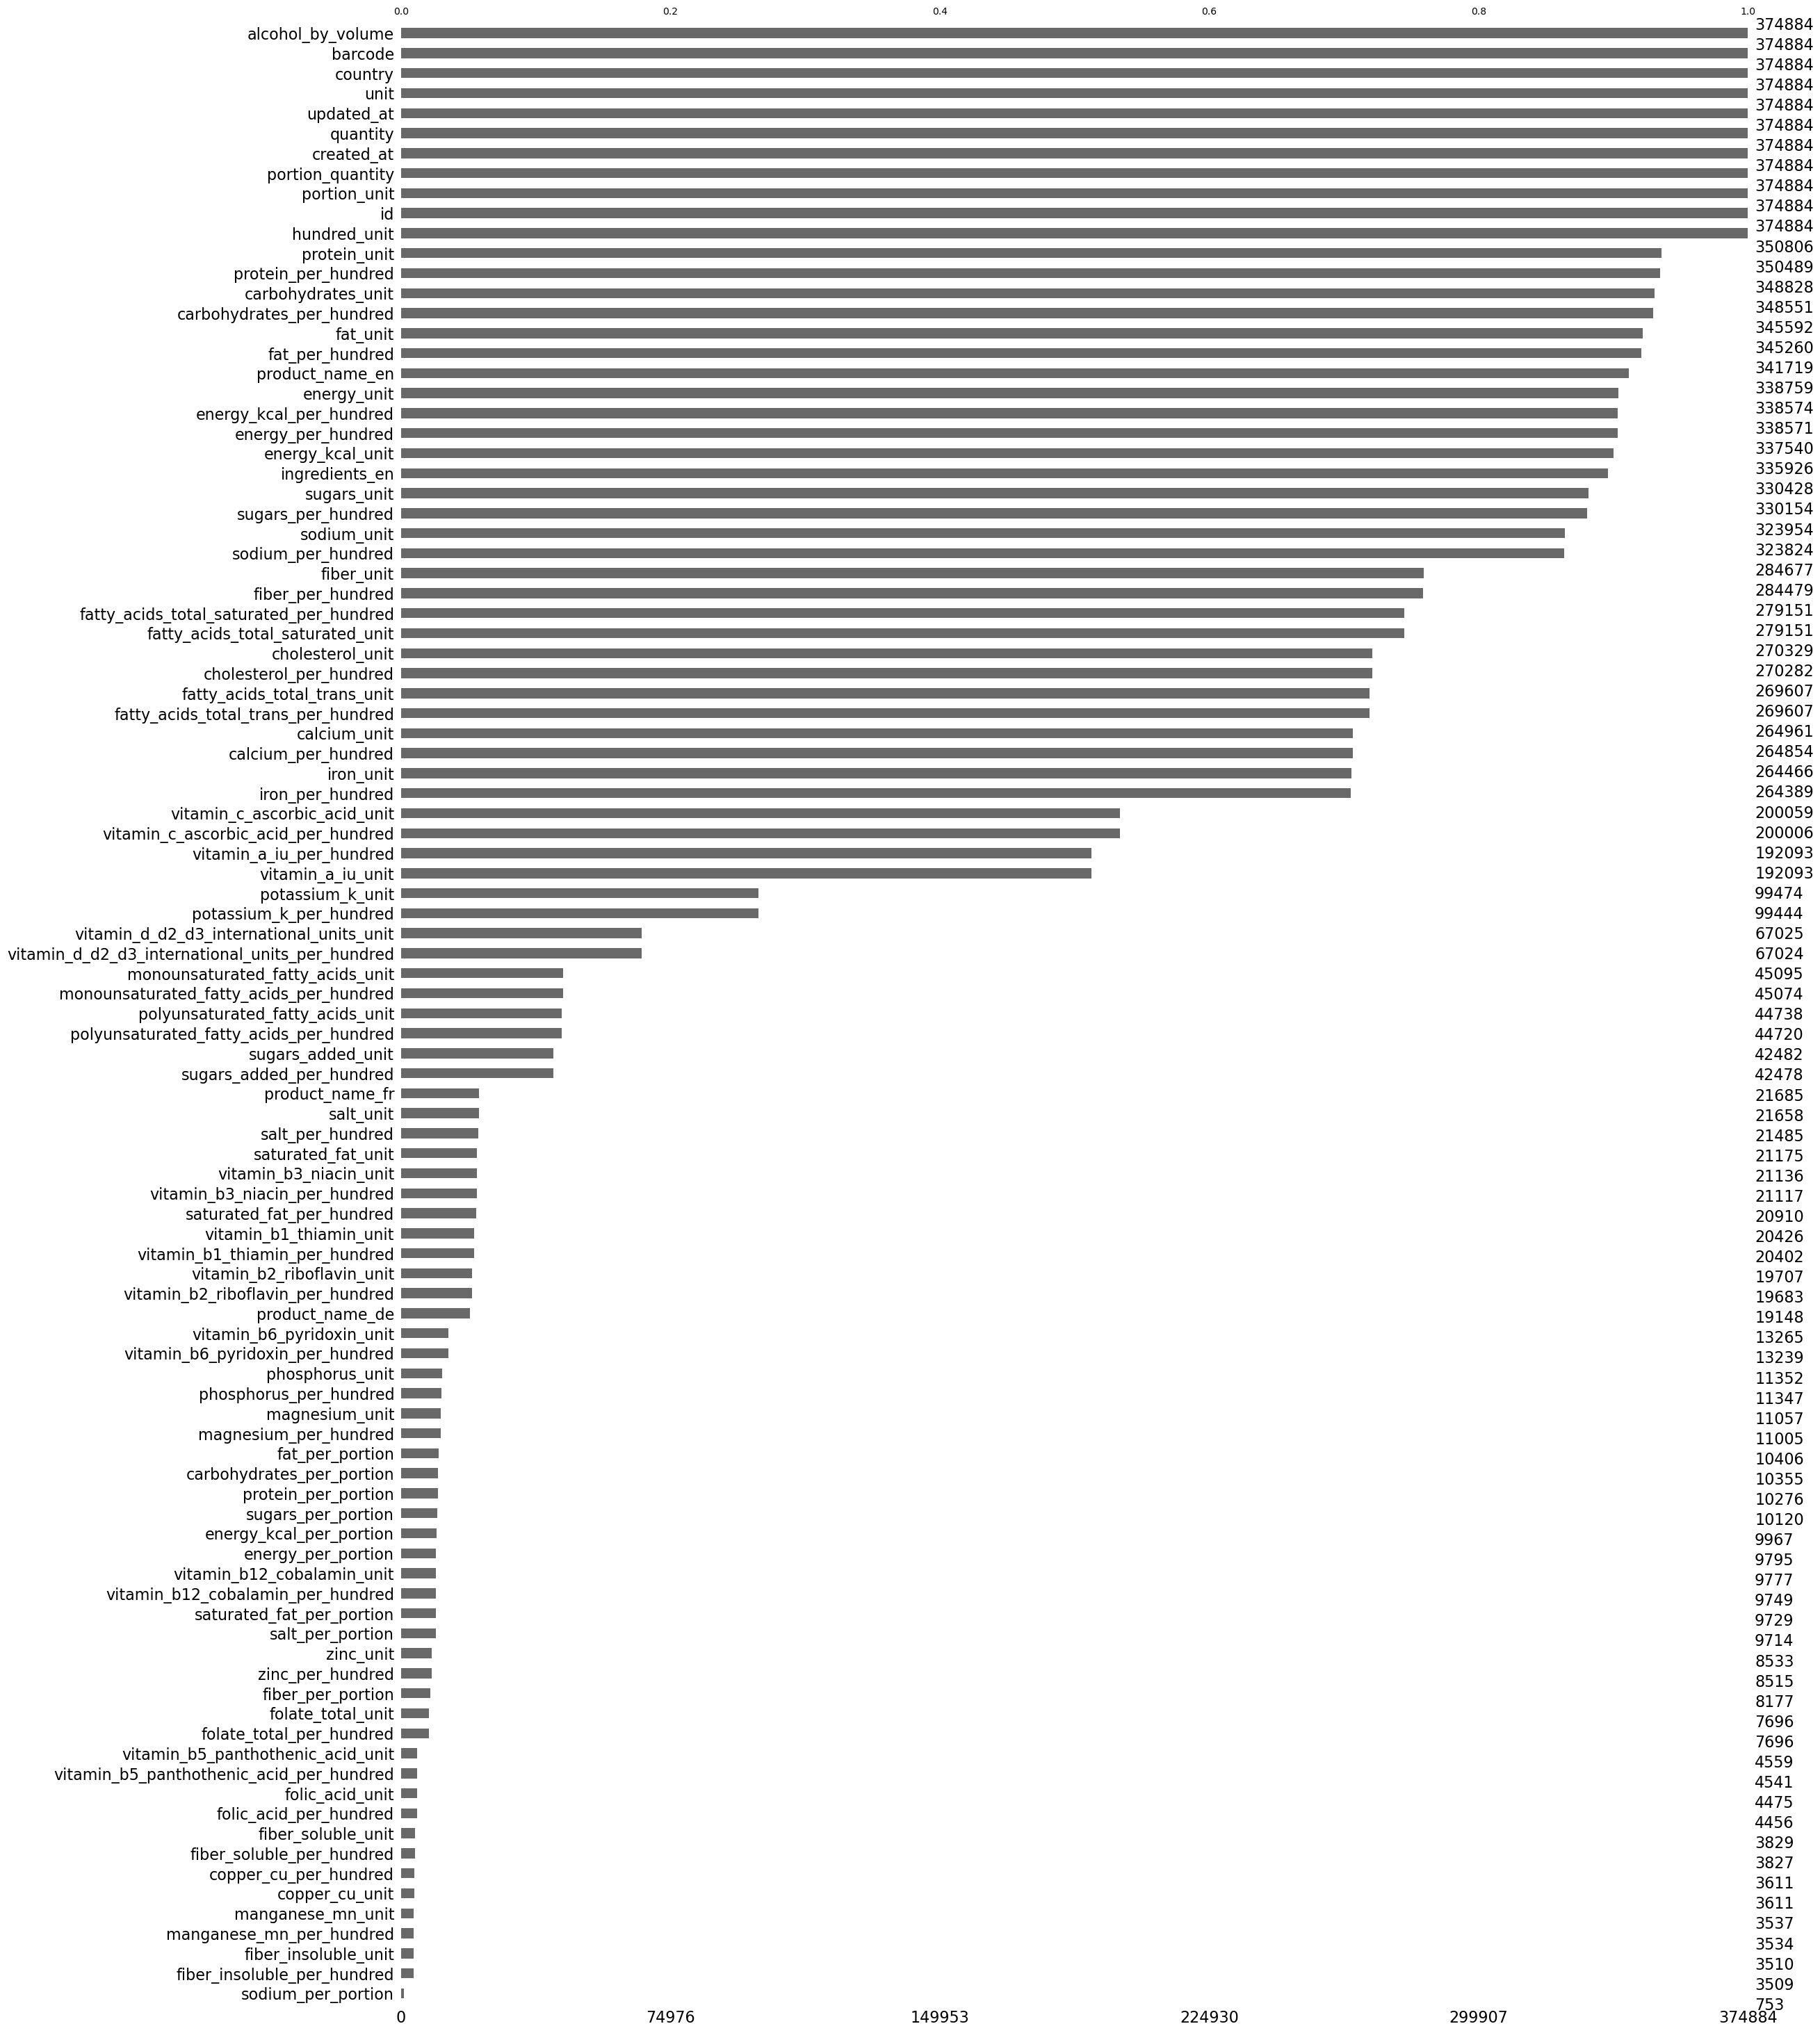

In [16]:
# Visualizing how many missing values are in each column using missingno bar chart
msn.bar(df2, sort="ascending")

ValueError: could not convert string to float: '--'

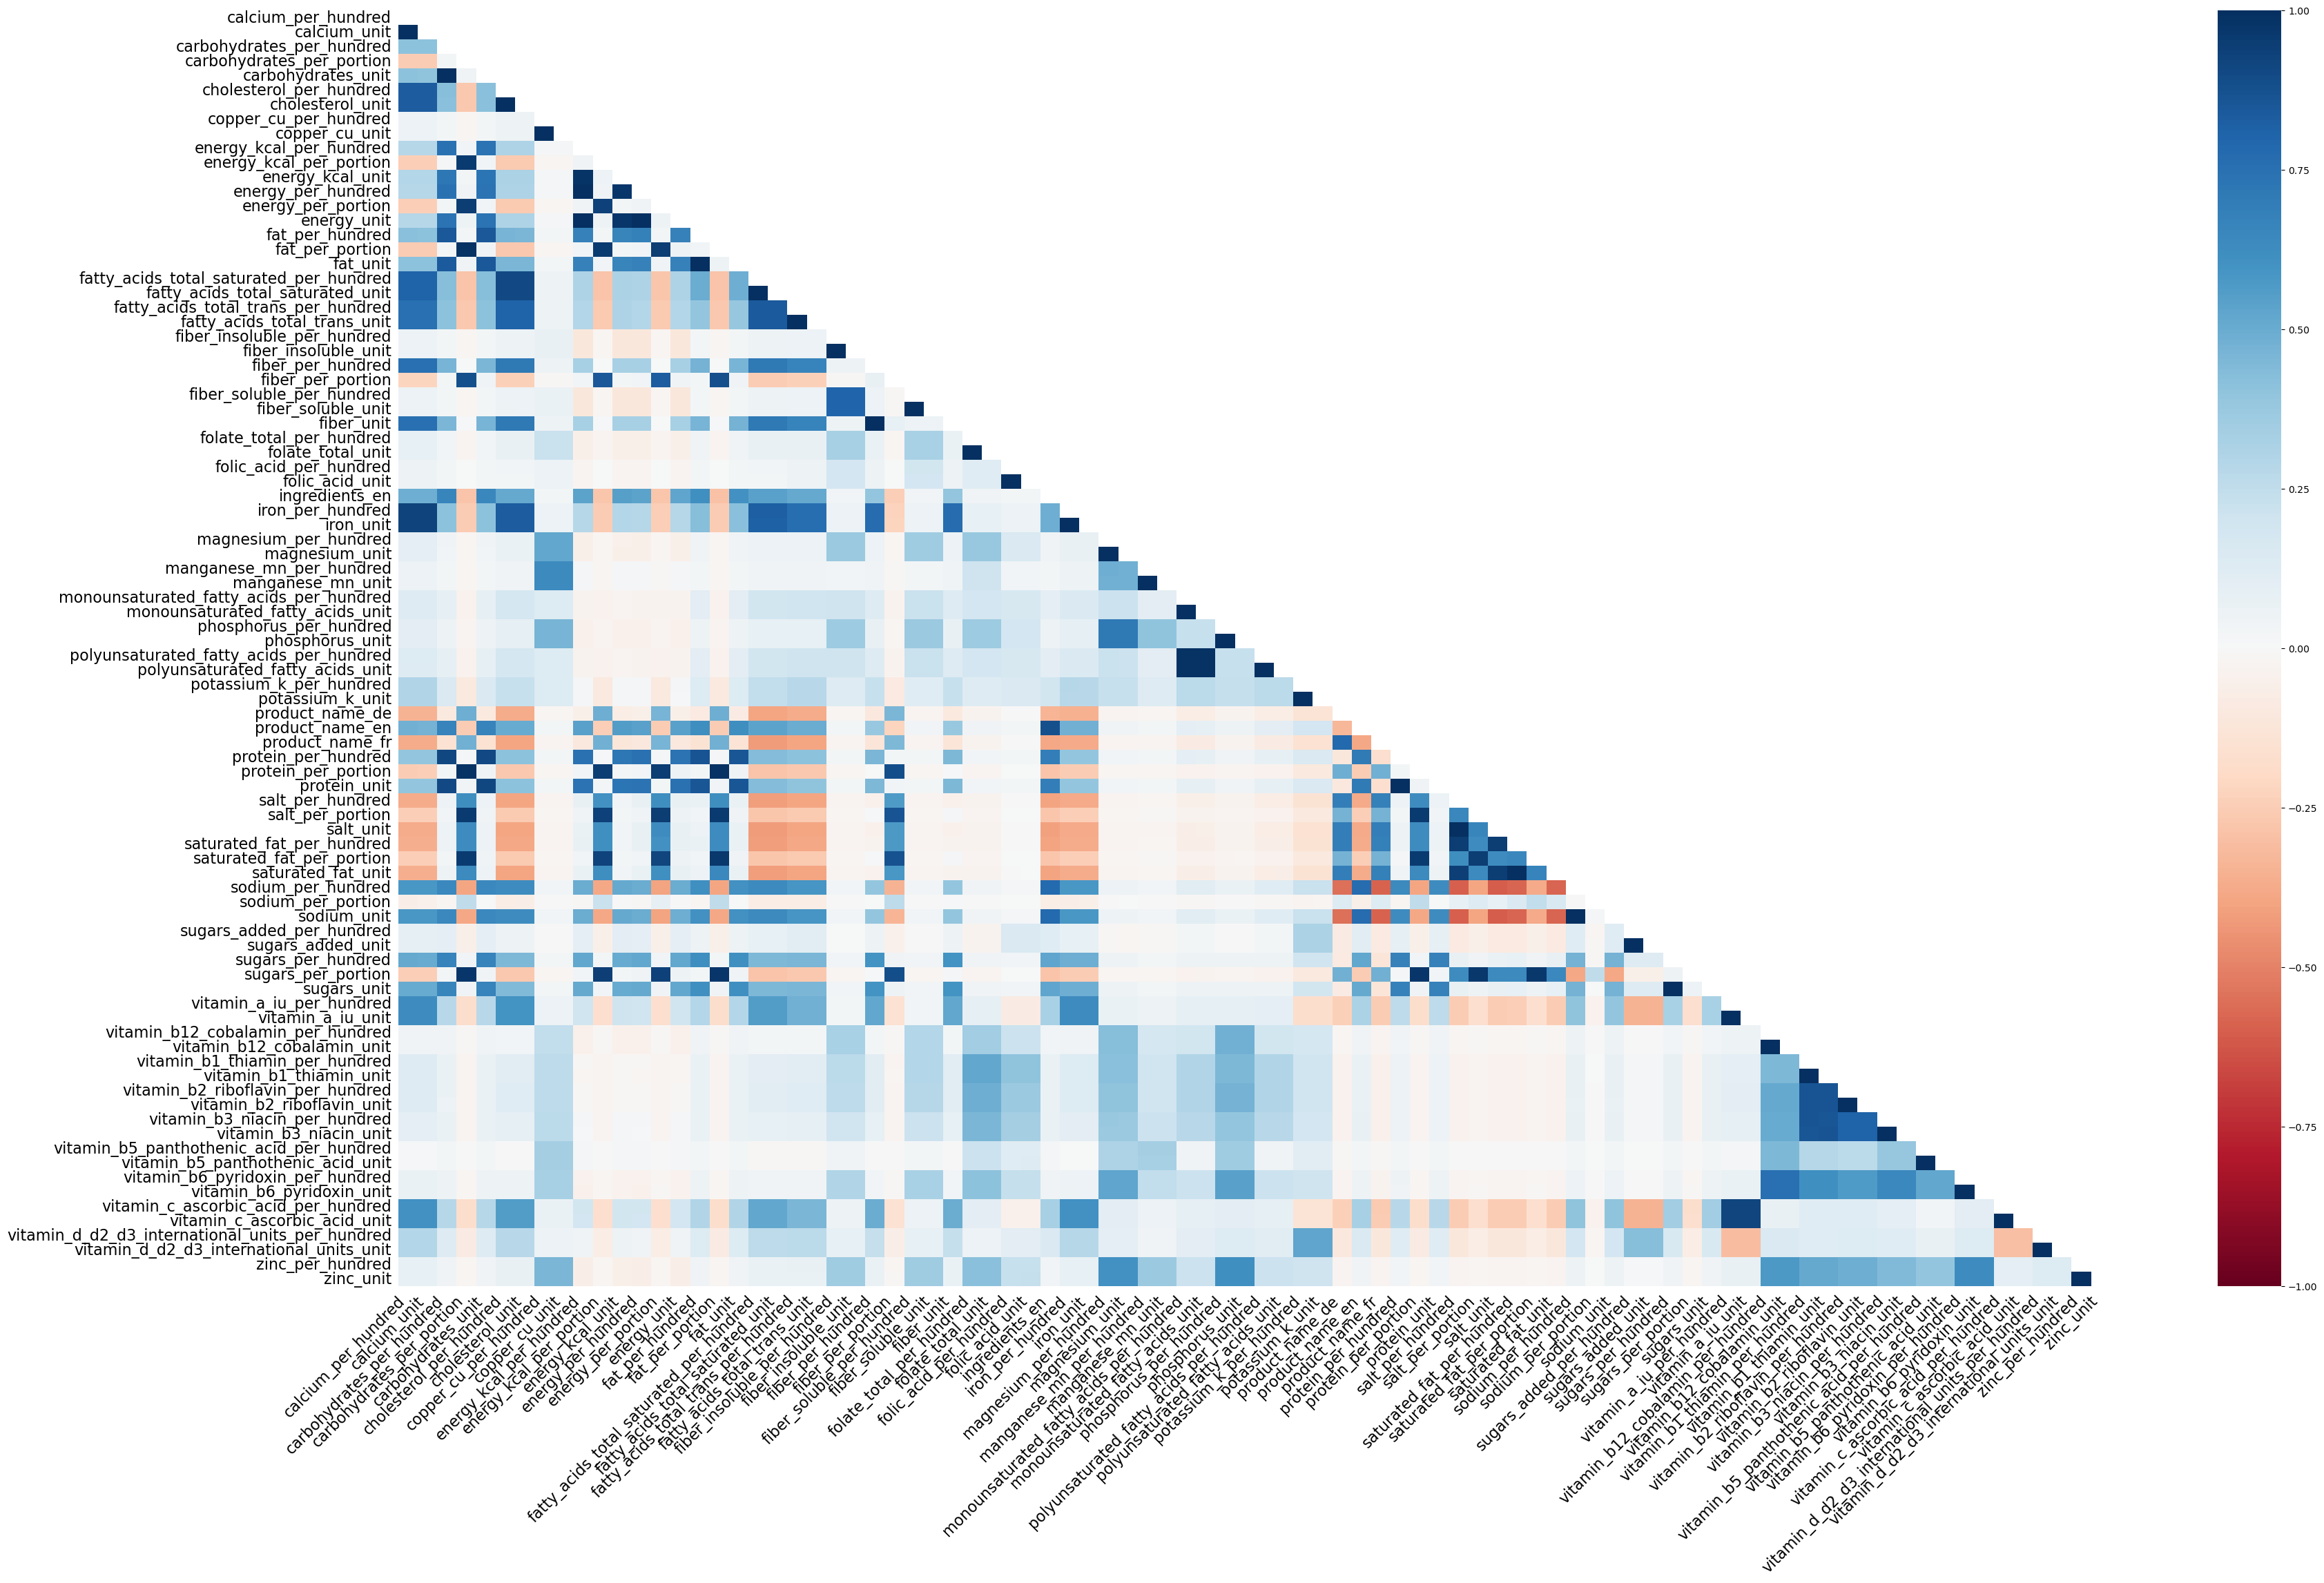

In [17]:
# Visualizing overlap using missingo heat map function
msn.heatmap(df2, figsize = (40,24))

#### Red squares represent the degree of positive correlation, i.e. if a value is present in one column, it is definitely also present in the other column. Example: saturated_fat_unit and calcium_per_hundred.

#### Blue squares in turn represent the degree of negative correlation, i.e. if a value is present in one column, it is definitely absent in the other column. Example: iron_per_hundred and calcium_per_hundred.

#### Finally, light squares indicate no correlation, i.e. the presence/absence of a value in one column has no effect on the presence/absence of a value in another column. Example: zinc_unit and calcium_per_hundred.

#### c) In task A5 we created 4 lists for the _per_hundred, _per_portion and _unit columns, and the remaining columns. Use these 4 lists to create 4 line plots or bar charts that show the percentages of missing values in each list. (In addition, you can also use missingno on these 4 reduced data frames)

In [18]:
column_unit.head(10)

calcium_unit carbohydrates_unit cholesterol_unit copper_cu_unit  \
0          NaN                  g              NaN            NaN   
1          NaN                  g              NaN            NaN   
2          NaN                  g              NaN            NaN   
3          NaN                  g              NaN            NaN   
4          NaN                  g              NaN            NaN   
5          NaN                  g              NaN            NaN   
6          NaN                  g              NaN            NaN   
7          NaN                  g              NaN            NaN   
8          NaN                  g              NaN            NaN   
9          NaN                  g              NaN            NaN   

  energy_kcal_unit energy_unit fat_unit fatty_acids_total_saturated_unit  \
0             kCal          kJ        g                              NaN   
1             kCal          kJ        g                              NaN   
2             kCal          kJ        g                              NaN   
3             kCal          kJ        g                              NaN   
4             kCal          kJ        g                              NaN   
5             kCal          kJ        g                              NaN   
6             kCal          kJ        g                              NaN   
7             kCal          kJ        g                              NaN   
8             kCal          kJ        g                              NaN   
9             kCal          kJ        g                              NaN   

  fatty_acids_total_trans_unit fiber_insoluble_unit  ... vitamin_a_iu_unit  \
0                          NaN                  NaN  ...               NaN   
1                          NaN                  NaN  ...               NaN   
2                          NaN                  NaN  ...               NaN   
3                          NaN                  NaN  ...               NaN   
4                          NaN                  NaN  ...               NaN   
5                          NaN                  NaN  ...               NaN   
6                          NaN                  NaN  ...               NaN   
7                          NaN                  NaN  ...               NaN   
8                          NaN                  NaN  ...               NaN   
9                          NaN                  NaN  ...               NaN   

  vitamin_b12_cobalamin_unit vitamin_b1_thiamin_unit  \
0                        NaN                     NaN   
1                        NaN                     NaN   
2                        NaN                     NaN   
3                        NaN                     NaN   
4                        NaN                     NaN   
5                        NaN                     NaN   
6                        NaN                     NaN   
7                        NaN                     NaN   
8                        NaN                     NaN   
9                        NaN                     NaN   

  vitamin_b2_riboflavin_unit vitamin_b3_niacin_unit  \
0                        NaN                    NaN   
1                        NaN                    NaN   
2                        NaN                    NaN   
3                        NaN                    NaN   
4                        NaN                    NaN   
5                        NaN                    NaN   
6                        NaN                    NaN   
7                        NaN                    NaN   
8                        NaN                    NaN   
9                        NaN                    NaN   

  vitamin_b5_panthothenic_acid_unit vitamin_b6_pyridoxin_unit  \
0                               NaN                       NaN   
1                               NaN                       NaN   
2                               NaN                       NaN   
3                               NaN                       NaN  

In [19]:
#Initiating 4 new empty dataframes
column_unit_missing_values = pd.DataFrame()
column_per_hundred_missing_values = pd.DataFrame()
column_per_portion_missing_values = pd.DataFrame()
other_columns_missing_values = pd.DataFrame()

#Populating these dataframes with number of missing values and percentage of missing values
column_unit_missing_values["Number of missing values"] = column_unit.isnull().sum()
column_unit_missing_values["Percentage of missing values"] = 100*column_unit.isnull().sum() / column_unit.shape[0]

column_per_hundred_missing_values["Number of missing values"] = column_per_hundred.isnull().sum().to_frame()
column_per_hundred_missing_values["Percentage of missing values"] = 100*column_per_hundred.isnull().sum() / column_per_hundred.shape[0]

column_per_portion_missing_values["Number of missing values"] = column_per_portion.isnull().sum().to_frame()
column_per_portion_missing_values["Percentage of missing values"] = 100*column_per_portion.isnull().sum() / column_per_portion.shape[0]

other_columns_missing_values["Number of missing values"] = other_columns.isnull().sum().to_frame()
other_columns_missing_values["Percentage of missing values"] = 100*other_columns.isnull().sum() / other_columns.shape[0]

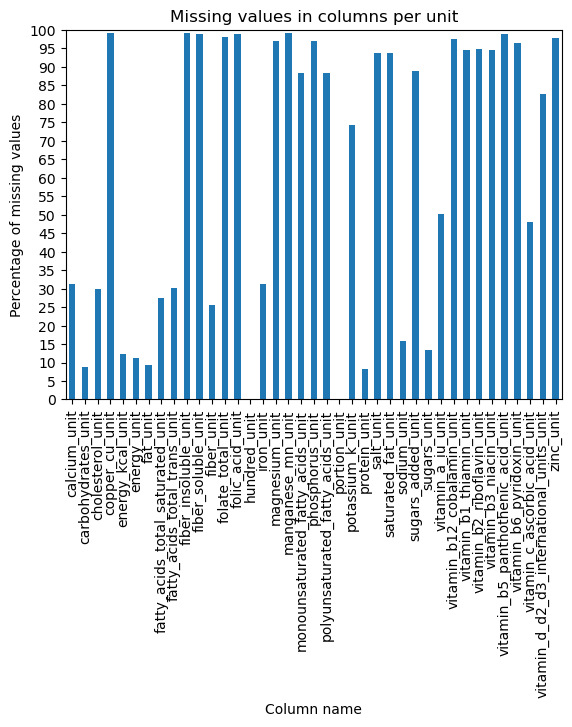

In [20]:
# Now plotting each of the four dataframes
column_unit_missing_values.plot(y="Percentage of missing values", kind="bar",
                                      legend=False, yticks=np.linspace(0,100,21),
                                      ylim=(0,100))
plt.xlabel("Column name")
plt.ylabel("Percentage of missing values")
plt.title("Missing values in columns per unit")
plt.show()

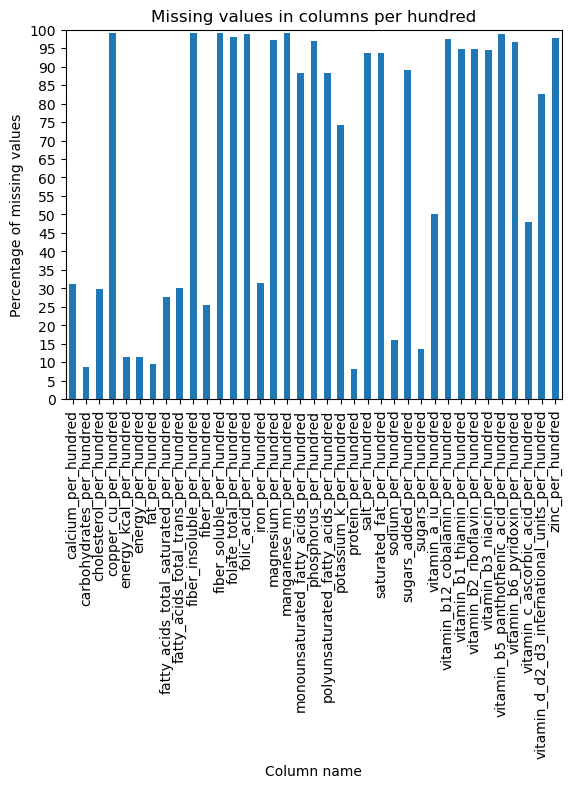

In [21]:
column_per_hundred_missing_values.plot(y="Percentage of missing values", kind="bar",
                                      legend=False, yticks=np.linspace(0,100,21),
                                      ylim=(0,100))
plt.xlabel("Column name")
plt.ylabel("Percentage of missing values")
plt.title("Missing values in columns per hundred")
plt.show()

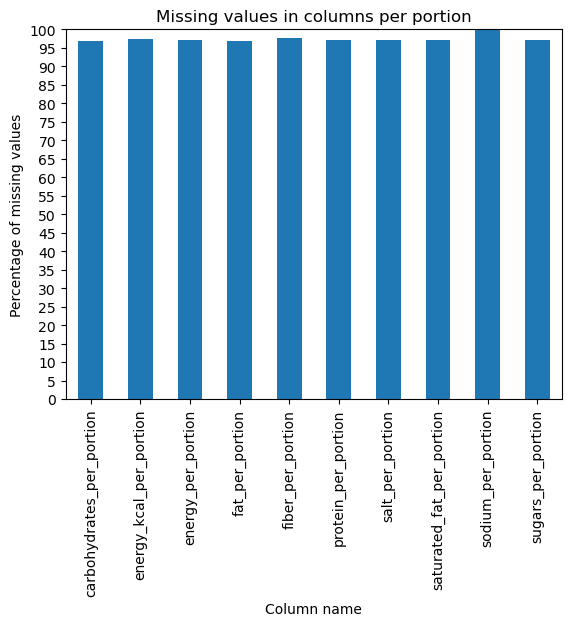

In [22]:
column_per_portion_missing_values.plot(y="Percentage of missing values", kind="bar",
                                      legend=False, yticks=np.linspace(0,100,21),
                                      ylim=(0,100))
plt.xlabel("Column name")
plt.ylabel("Percentage of missing values")
plt.title("Missing values in columns per portion")
plt.show()

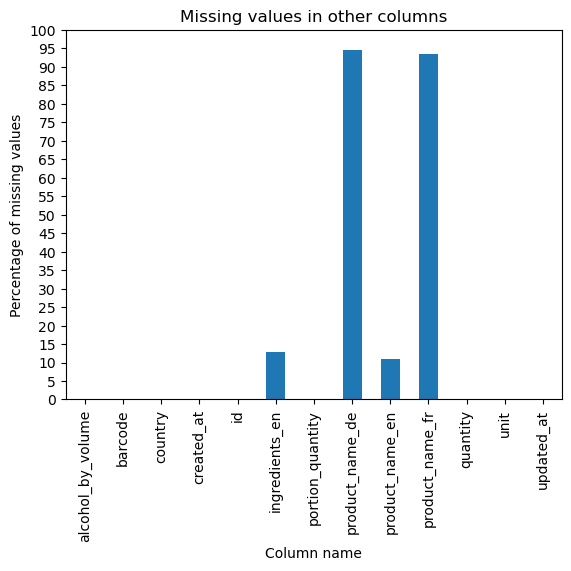

In [23]:
other_columns_missing_values.plot(y="Percentage of missing values", kind="bar",
                                      legend=False, yticks=np.linspace(0,100,21),
                                      ylim=(0,100))
plt.xlabel("Column name")
plt.ylabel("Percentage of missing values")
plt.title("Missing values in other columns")
plt.show()

<Axes: >

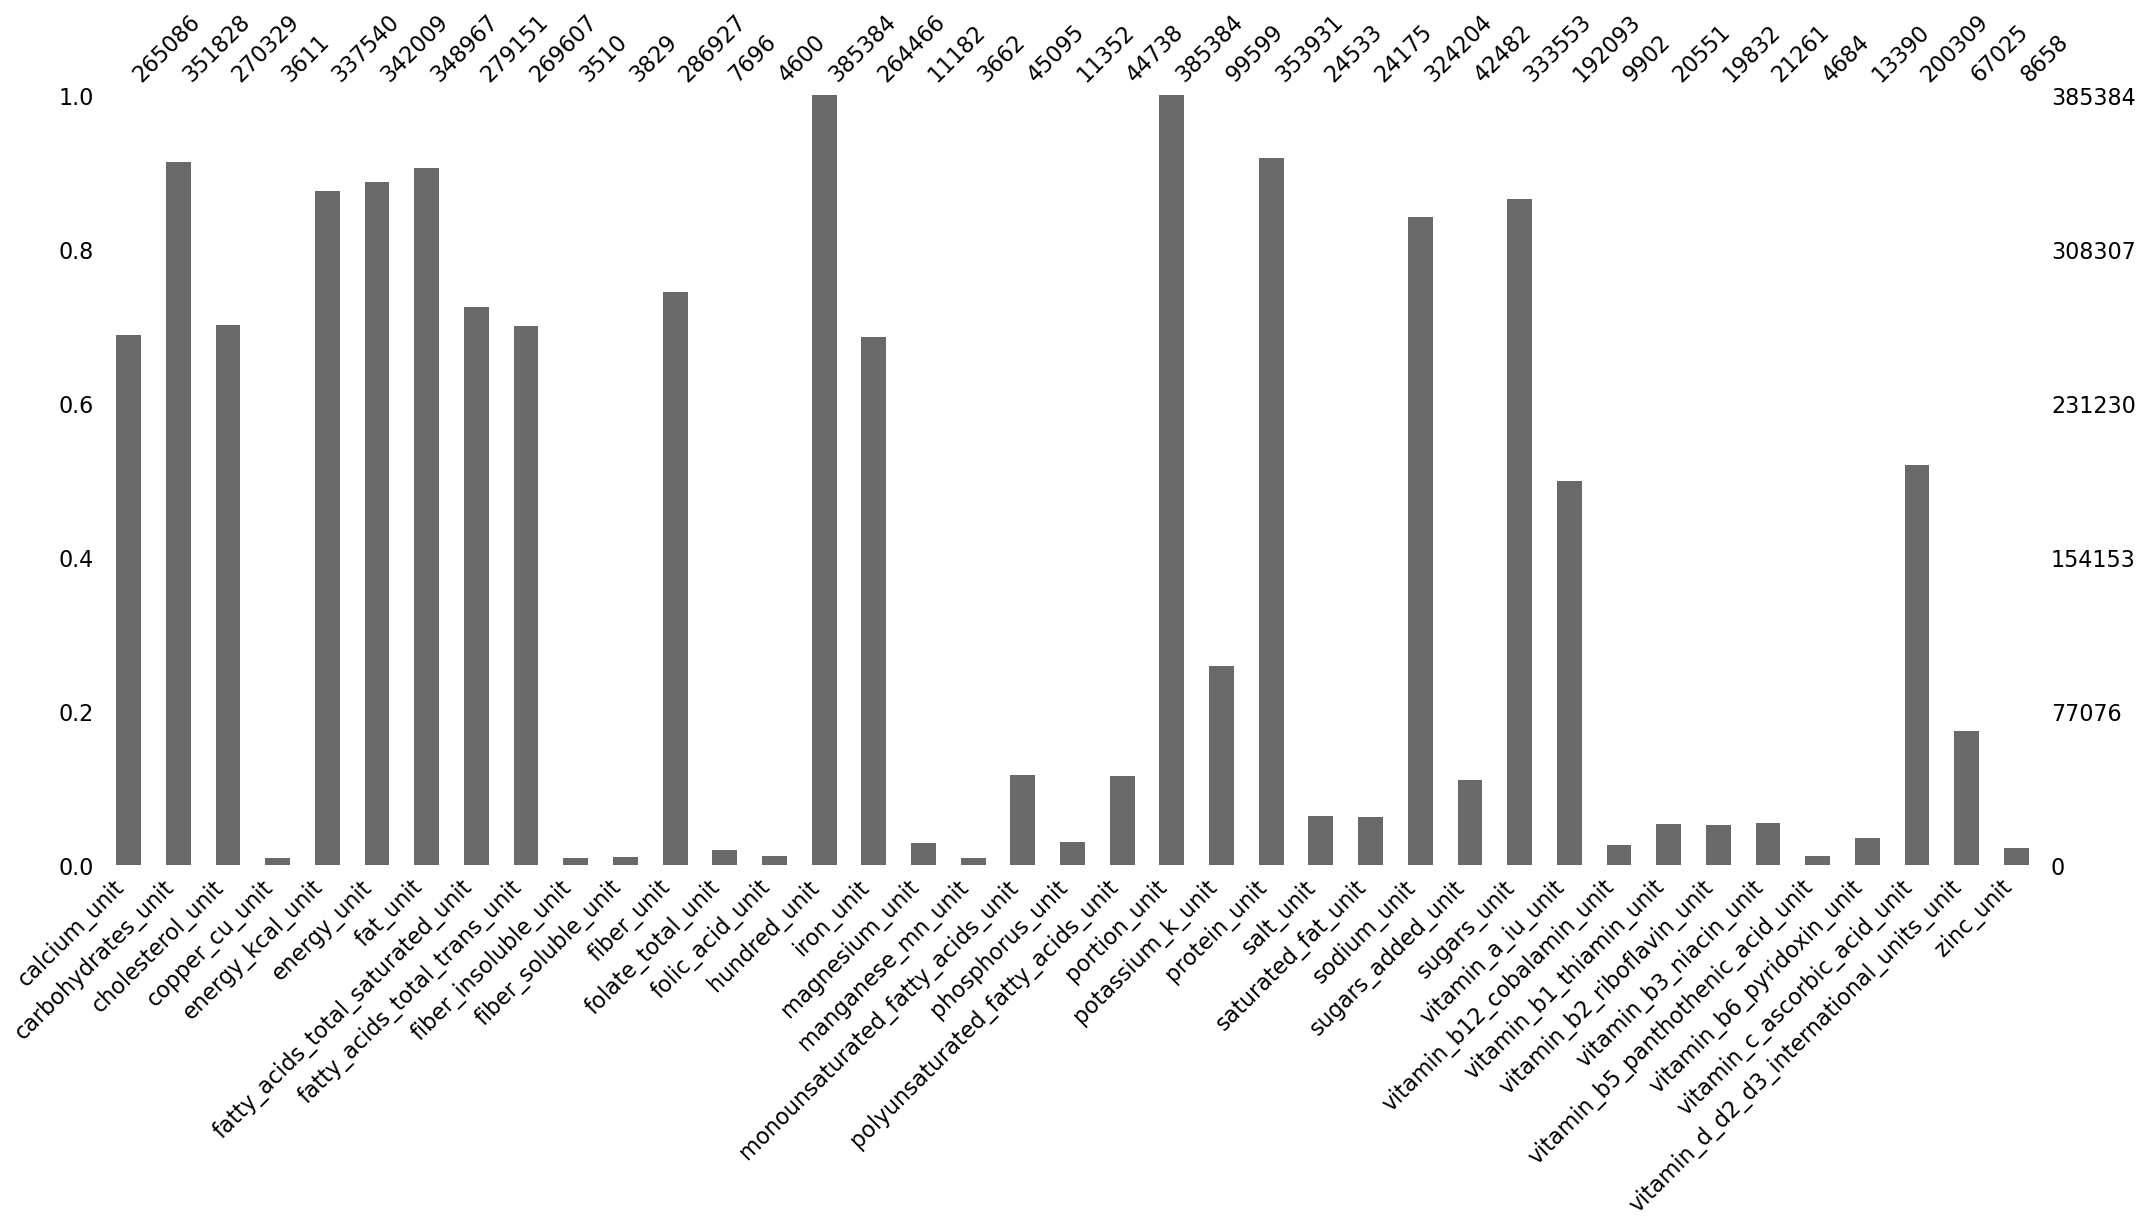

In [24]:
# Now using the missingno library (grey bars show presence of values, so these graphs below 
# are the "complement" of the graphs above, in which blue bars show missing values).
msn.bar(column_unit)

<Axes: >

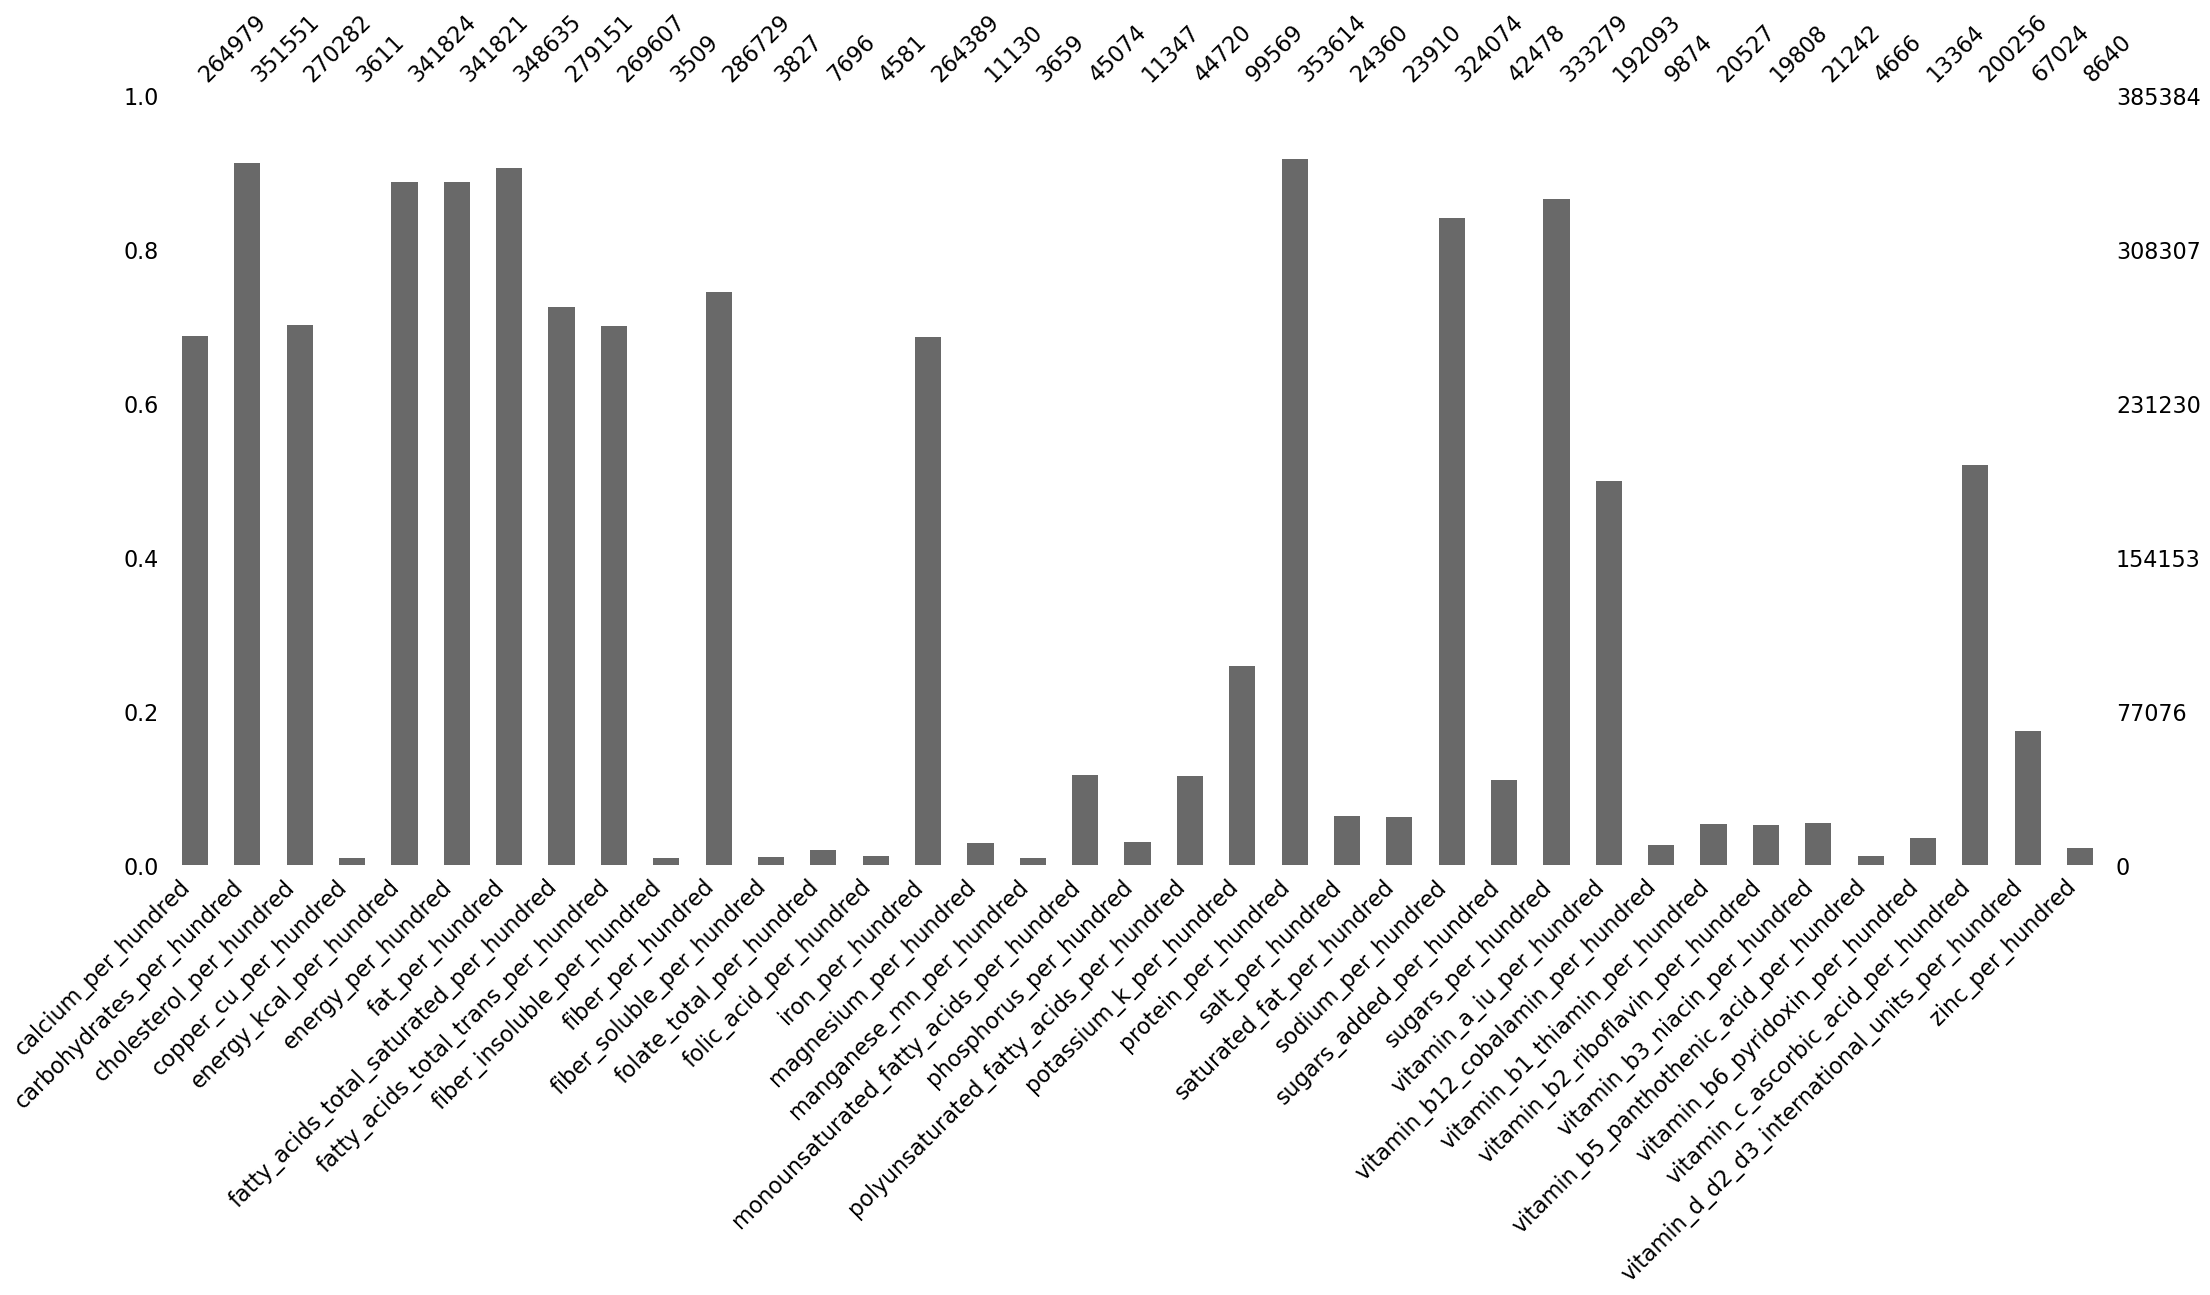

In [25]:
msn.bar(column_per_hundred)

<Axes: >

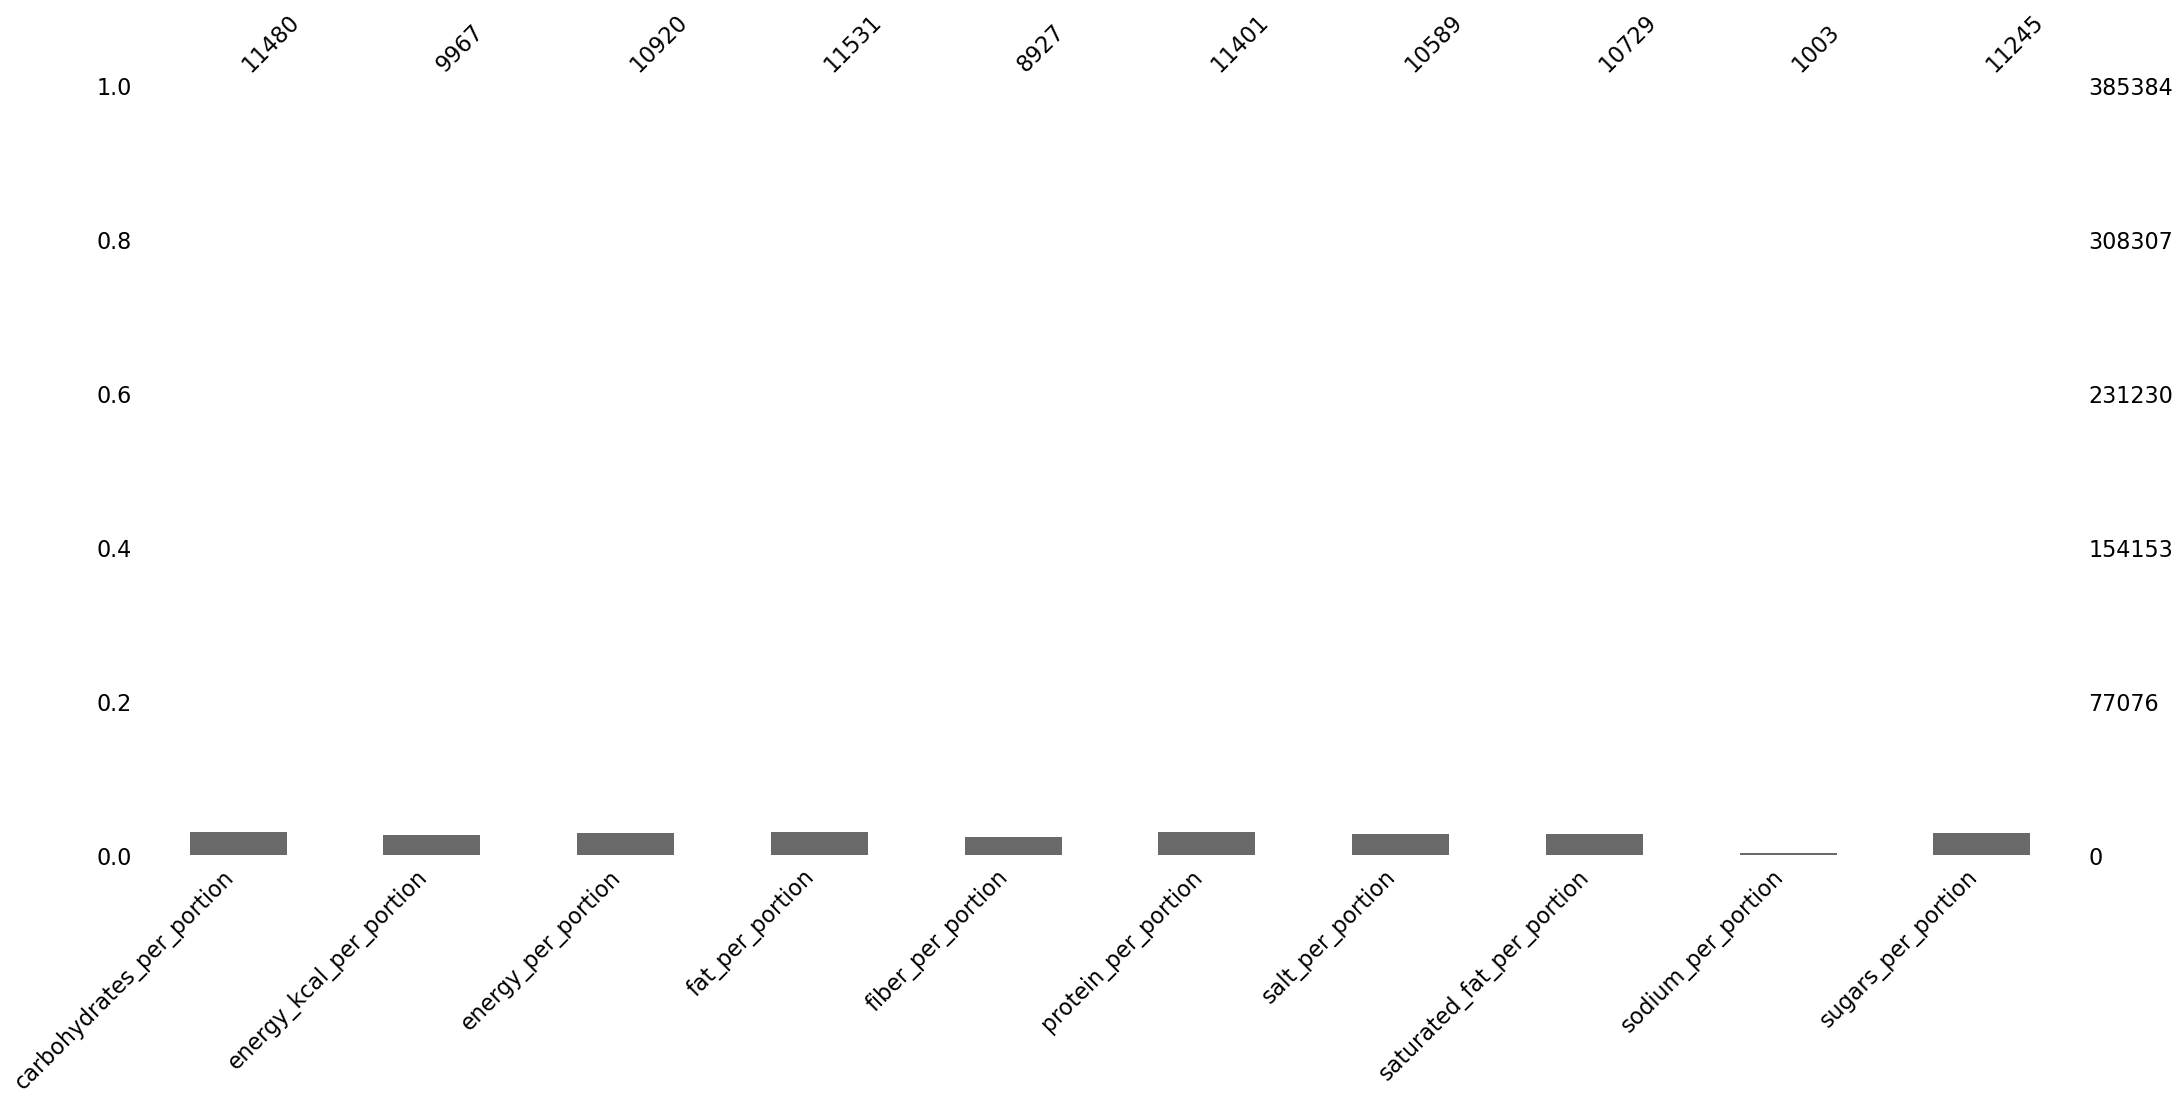

In [26]:
msn.bar(column_per_portion)

<Axes: >

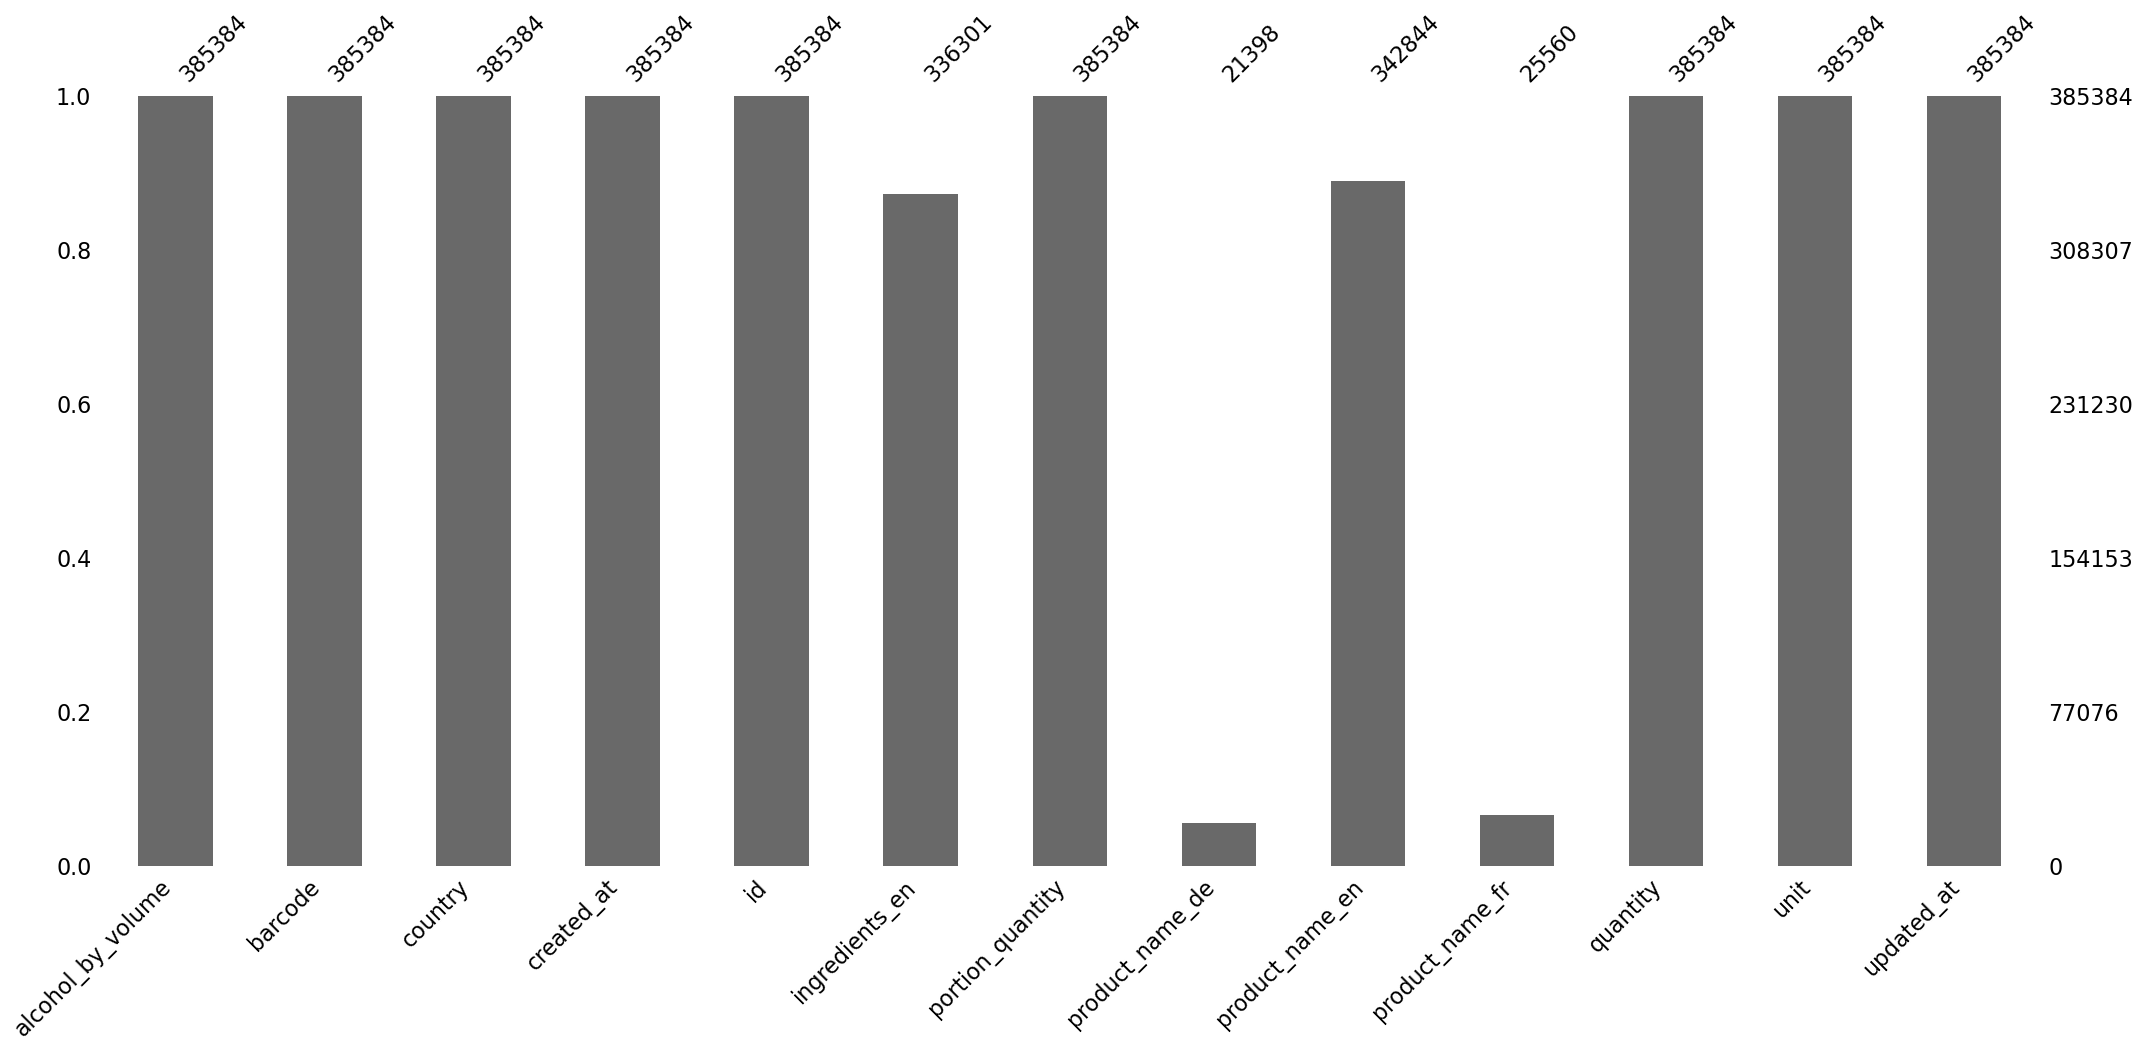

In [27]:
msn.bar(other_columns)

## B3

#### Now that you know the extent of missing values in the data, it is time to address them. Your goal is to keep as much data as possible in your data frame. At each step report how many samples and features remain.

#### a) As a first step, remove rows and columns that are completely empty (if there is any).

In [28]:
# Dropping rows where all values are NaN
df2.shape

(374884, 99)

In [29]:
df3 = df2.dropna(how="all")
df3.shape

(374884, 99)

#### Shape has not changed, so no row contains only NaN values

In [30]:
# Dropping all columns where all values are NaN
df3 = df2.dropna(axis=1, how="all")

In [31]:
df3.shape

(374884, 99)

#### Shape has not changed, so no column contains only NaN values

#### b) Start with your list of _unit columns, and check some of them and show what information they hold. One simple approach to fill up missing values in categorical columns is to use the most frequent value as a proxy for the missing value. Apply this approach to the _unit columns.

In [32]:
#Checking what information the different per unit columns hold
column_unit.head(20)

calcium_unit carbohydrates_unit cholesterol_unit copper_cu_unit  \
0           NaN                  g              NaN            NaN   
1           NaN                  g              NaN            NaN   
2           NaN                  g              NaN            NaN   
3           NaN                  g              NaN            NaN   
4           NaN                  g              NaN            NaN   
5           NaN                  g              NaN            NaN   
6           NaN                  g              NaN            NaN   
7           NaN                  g              NaN            NaN   
8           NaN                  g              NaN            NaN   
9           NaN                  g              NaN            NaN   
10           mg                  g              NaN            NaN   
11          NaN                  g              NaN            NaN   
12          NaN                  g              NaN            NaN   
13          NaN                  g              NaN            NaN   
14          NaN                  g              NaN            NaN   
15          NaN                  g              NaN            NaN   
16          NaN                  g              NaN            NaN   
17          NaN                  g              NaN            NaN   
18          NaN                  g              NaN            NaN   
19          NaN                  g              NaN            NaN   

   energy_kcal_unit energy_unit fat_unit fatty_acids_total_saturated_unit  \
0              kCal          kJ        g                              NaN   
1              kCal          kJ        g                              NaN   
2              kCal          kJ        g                              NaN   
3              kCal          kJ        g                              NaN   
4              kCal          kJ        g                              NaN   
5              kCal          kJ        g                              NaN   
6              kCal          kJ        g                              NaN   
7              kCal          kJ        g                              NaN   
8              kCal          kJ        g                              NaN   
9              kCal          kJ        g                              NaN   
10             kCal          kJ        g                              NaN   
11              NaN         NaN      NaN                              NaN   
12             kCal          kJ        g                              NaN   
13             kCal          kJ        g                              NaN   
14             kCal          kJ        g                              NaN   
15             kCal          kJ        g                              NaN   
16             kCal          kJ        g                              NaN   
17              NaN         NaN      NaN                              NaN   
18             kCal          kJ        g                              NaN   
19              NaN         NaN      NaN                              NaN   

   fatty_acids_total_trans_unit fiber_insoluble_unit  ... vitamin_a_iu_unit  \
0                           NaN                  NaN  ...               NaN   
1                           NaN                  NaN  ...               NaN   
2                           NaN                  NaN  ...               NaN   
3                           NaN                  NaN  ...               NaN   
4                           NaN                  NaN  ...               NaN   
5                           NaN                  NaN  ...               NaN   
6                           NaN                  NaN  ...               NaN   
7                           NaN                  NaN  ...               NaN   
8                           NaN                  NaN  ...               NaN   
9                           NaN                  NaN  ...               NaN   
10                          NaN              

In [33]:
#Filling missing values in per unit columns of df2 with most frequent value of each column
for column in column_unit.columns:
    most_frequent_value = column_unit[column].value_counts().idxmax()
    df2[column].fillna(value=most_frequent_value, inplace=True)

#### c) As a second strategy, let’s fill up the missing values of a column using other columns that hold similar information. Apply this approach to the product_name_en column. Find columns that hold similar information and use them to replace the missing value in product_name_en. Report the numberisnullrows that you managed to fill up.

In [34]:
# Checking list other_columns for similar columns to product_name_en
other_columns.head(20)

alcohol_by_volume        barcode country                created_at    id  \
0                 0.0  8001772000030      CH  2016-06-01T11:42:22.908Z  1000   
1                 0.0  7610809001066      CH  2016-06-01T11:42:25.111Z  1001   
2                 0.0  8002530159021      CH  2016-06-01T11:42:25.900Z  1002   
3                 0.0  3033715065788      CH  2016-06-01T11:42:26.184Z  1003   
4                 0.0  7610848492740      CH  2016-06-01T11:42:26.350Z  1004   
5                 0.0  7610100033247      CH  2016-06-01T11:42:29.472Z  1005   
6                 0.0       76145513      CH  2016-06-02T14:01:44.255Z  1010   
7                 0.0  7610800826040      CH  2016-06-02T14:01:51.499Z  1011   
8                 0.0  7611654576754      CH  2016-06-02T14:01:53.274Z  1012   
9                 0.0  5000159023061      CH  2016-06-02T14:01:53.348Z  1013   
10                0.0  7640155340045      CH  2016-06-02T14:02:40.575Z  1014   
11                0.0  7640155340014      CH  2016-06-02T14:02:47.788Z  1015   
12                0.0  7610849101801      CH  2016-06-02T14:02:50.467Z  1016   
13                0.0  5060283760003      CH  2016-06-02T14:02:51.727Z  1017   
14                0.0  5060283760034      CH  2016-06-02T14:02:54.940Z  1018   
15                0.0  5060283760126      CH  2016-06-02T14:03:01.930Z  1019   
16                0.0  7610803008085      CH  2016-06-02T14:03:05.559Z  1020   
17                0.0  7640155340038      CH  2016-06-02T14:03:07.327Z  1021   
18                0.0  7610849101818      CH  2016-06-02T14:03:15.447Z  1022   
19                0.0  7640155340021      CH  2016-06-02T14:03:17.175Z  1023   

                                       ingredients_en  portion_quantity  \
0   Superior quality durum wheat Pasta\r\n\r\nIngr...              50.0   
1                Bio Milk (Switzerland), kitchen salt              75.0   
2                                100%  coffee Arabica               0.0   
3   Powdered chocolate 99% (sugar, cocoa), emulsif...              17.0   
4   cocoa paste * (Honduras), raw cane sugar * (Pa...              20.0   
5                                        cocoa powder              17.0   
6   Sugar, whole milk powder, cocoa butter, cocoa ...              25.0   
7                                   durum wheat flour               0.0   
8                                               Honey              10.0   
9   Sugar, Skimmed Milk Powder, Cocoa Butter, Gluc...               0.0   
10  organic dates (45%), organic coconut (19%), or...              42.0   
11                                                NaN               0.0   
12                                                NaN              10.0   
13  Popped corn, rapeseed oil, sea salt. May conta...              20.0   
14  Popped corn, rapeseed oil, brown cane sugar, s...              30.0   
15  Popped corn, rapeseed oil, sugar, rice flour, ...              25.0   
16                                                NaN               0.0   
17  Organic dates (42%), organic cocoa paste (16%)...              42.0   
18                                                NaN              10.0   
19  Organic dates (33%), organic apples (30%), org...              42.0   

                             product_name_de  \
0                            Bio Spaghetti     
1                      Naturaplan Mozzarella   
2                   Caffè Mauro - Bio Kaffe    
3   Le chocolat Cailler -  schokoladenpulver   
4      Naturaplan ExtraDunkle Schokolade 70%   
5                      Cailler - Kakaopulver   
6                                  Toblerone   
7                                Knöpflimehl   
8                 Naturaplan Bio Blütenhonig   
9                                        NaN   
10               Rhythm 108 Kokosnussmakrone   
11                 Rythm 108 - banana muffin   
12             Naturaplan Konfitüre Aprikose   
13                                       NaN   
14                         

#### The columns product_name_de and product_name_fr hold similar information. So, I will use these columns to fill missing values in column product_name_en.

In [35]:
#Number of empty rows in column product_name_en before filling
empty_row_bef_fill = df2["product_name_en"].isnull().sum()

#Filling column product_name_en
df2["product_name_en"].fillna(value=df2["product_name_de"], inplace=True)
df2["product_name_en"].fillna(value=df2["product_name_fr"], inplace=True)

#Number of empty rows in column product_name_en after filling
empty_row_after_fill = df2["product_name_en"].isnull().sum()

#Difference
print("The number of filled columns is:")
print(empty_row_bef_fill - empty_row_after_fill)

The number of filled columns is:
14299


#### d) As a third strategy, let’s fill up missing values based on common knowledge. Take the column named iron_per_hundred which has about 30% missing values. One possible explanation for its missing values could be that those products are iron-free (like ice cream). Based on this assumption address the missing values for iron_per_hundred.

In [36]:
#Filling missing values in column iron_per_hundred with mean value of this column
df2["iron_per_hundred"].fillna(value=df["iron_per_hundred"].mean(), inplace=True)

#### e) Another strategy for text-based columns is to indicate that some of the fields are missing. For instance, the column ingredients_en has about 10% of missing values. Let’s replace them with the term ingredient_missing.

In [37]:
df2["ingredients_en"].fillna(value="ingredient_missing", inplace=True)

#### f) Finally, let’s assume that you want to build up your data analysis pipeline based on at least 20,000 rows of non-missing data. This amounts to about 5% of the data set. Your task is to drop the columns that have more than 95% of missing values. What is the shape of the remaining data?


95% of missing values means a threshold of:  

In [38]:
print("Our dataframe currently has " + str(df2.isnull().sum().sum()) + " missing values")

Our dataframe currently has 13259912 missing values


In [39]:
#Now dropping all columns which have at least 95% missing values
df2.dropna(thresh=20000, axis=1, inplace=True)

In [40]:
print("After this operation, our dataframe now only has " + str(df2.isnull().sum().sum()) + " missing values")

After this operation, our dataframe now only has 4475848 missing values


In [41]:
print("The shape of the remaining data is " + str(df2.shape))

The shape of the remaining data is (374884, 75)


# Task C

#### 1. Let’s start by exploring the categorical variables in more detail. What is the number of unique values in categorical variables? Show the proportion of samples in each categorical level in the variables country and unit using appropriate visualizations.



In [42]:
df2.head()

alcohol_by_volume        barcode  calcium_per_hundred calcium_unit  \
0                0.0  8001772000030                  NaN           mg   
1                0.0  7610809001066                  NaN           mg   
2                0.0  8002530159021                  NaN           mg   
3                0.0  3033715065788                  NaN           mg   
4                0.0  7610848492740                  NaN           mg   

   carbohydrates_per_hundred carbohydrates_unit  cholesterol_per_hundred  \
0                      75.00                  g                      NaN   
1                       1.50                  g                      NaN   
2                      52.68                  g                      NaN   
3                      70.40                  g                      NaN   
4                      37.00                  g                      NaN   

  cholesterol_unit copper_cu_unit country  ... vitamin_b2_riboflavin_unit  \
0               mg             mg      CH  ...                         mg   
1               mg             mg      CH  ...                         mg   
2               mg             mg      CH  ...                         mg   
3               mg             mg      CH  ...                         mg   
4               mg             mg      CH  ...                         mg   

   vitamin_b3_niacin_per_hundred vitamin_b3_niacin_unit  \
0                            NaN                     mg   
1                            NaN                     mg   
2                            NaN                     mg   
3                            NaN                     mg   
4                            NaN                     mg   

   vitamin_b5_panthothenic_acid_unit vitamin_b6_pyridoxin_unit  \
0                                 mg                        mg   
1                                 mg                        mg   
2                                 mg                        mg   
3                                 mg                        mg   
4                                 mg                        mg   

   vitamin_c_ascorbic_acid_per_hundred vitamin_c_ascorbic_acid_unit  \
0                                  NaN                           mg   
1                                  NaN                           mg   
2                                  NaN                           mg   
3                                  NaN                           mg   
4                                  NaN                           mg   

   vitamin_d_d2_d3_international_units_per_hundred  \
0                                              NaN   
1                                              NaN   
2                                              NaN   
3                                              NaN   
4                                              NaN   

  vitamin_d_d2_d3_international_units_unit  zinc_unit  
0                                       IU         mg  
1                                       IU         mg  
2                                       IU         mg  
3                                       IU         mg  
4                                       IU         mg  

[5 rows x 75 columns]

In [43]:
# Showing the number of unique values in categorical variables 
for column in df2.columns:
    if df2[column].dtypes == "object":
        print(str(column) + " " + str(df2[column].unique()))

barcode ['8001772000030' '7610809001066' '8002530159021' ... '3046920021593'
 '4044889004335' '7613379866622']
calcium_unit ['mg']
carbohydrates_unit ['g']
cholesterol_unit ['mg']
copper_cu_unit ['mg']
country ['CH' 'FR' 'IT' 'DE' 'AT' 'UK' 'US']
created_at ['2016-06-01T11:42:22.908Z' '2016-06-01T11:42:25.111Z'
 '2016-06-01T11:42:25.900Z' ... '2021-10-04T14:22:10.685Z'
 '2021-10-04T14:27:36.157Z' '2021-10-04T16:10:49.085Z']
energy_kcal_unit ['kCal']
energy_unit ['kJ']
fat_unit ['g']
fatty_acids_total_saturated_unit ['g']
fatty_acids_total_trans_unit ['g']
fiber_insoluble_unit ['g']
fiber_soluble_unit ['g']
fiber_unit ['g']
folate_total_unit ['µg']
folic_acid_unit ['µg']
hundred_unit ['g' 'ml' '?']
ingredients_en ['Superior quality durum wheat Pasta\r\n\r\nIngredients: Durum wheat, water\r\n\r\nAll agricultural ingredients are products of organic farming'
 'Bio Milk (Switzerland), kitchen salt' '100%  coffee Arabica' ...
 'Water, Aloe vera gel powder 12%, Sugar, Aloe vera crush 8%, Aloe

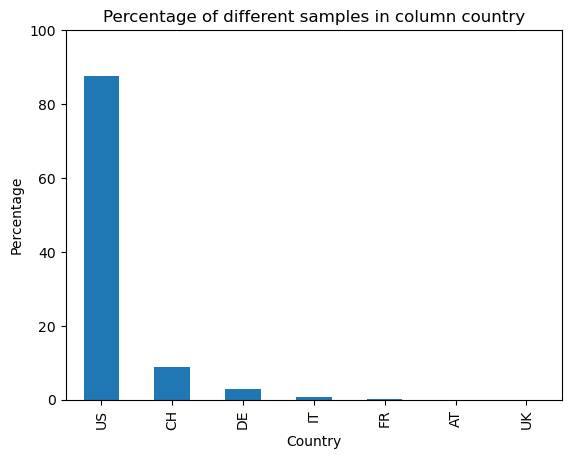

In [44]:
# Showing the proportion of samples in each categorical level in the variables country and unit using 
# appropriate visualizations

# Initiating empty lists for counting number of values
country_list = []
unit_list = []

# Counting number of occurences of each sample in the columns country and unit
country_list = df2["country"].value_counts().to_frame()
unit_list = df2["unit"].value_counts().to_frame()

#Calculating proportions
country_list["Percentage"] = 100 * country_list["count"] / country_list["count"].sum()
unit_list["Percentage"] = 100 * unit_list["count"] / unit_list["count"].sum()

# Plotting for country_list
bar_plot_country = country_list.plot.bar(y="Percentage", legend=False)
plt.xlabel("Country")
plt.ylabel("Percentage")
plt.ylim(0,100)
plt.title("Percentage of different samples in column country")
plt.show()

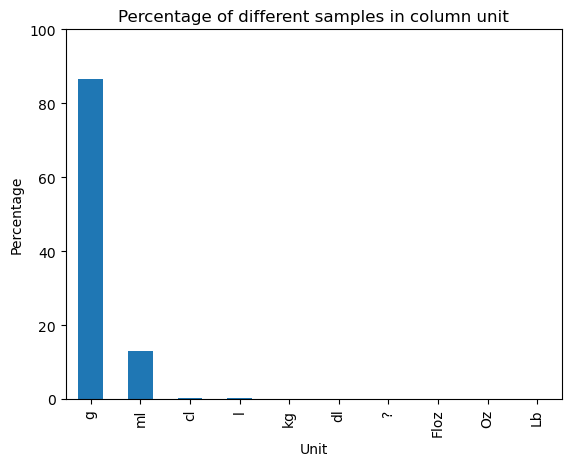

In [45]:
# Plotting for unit_list
bar_plot_unit = unit_list.plot.bar(y="Percentage", legend=False)
plt.xlabel("Unit")
plt.ylabel("Percentage")
plt.ylim(0,100)
plt.title("Percentage of different samples in column unit")
plt.show()

#### 2. Provide descriptive statistics (e.g., min/max/mean) and informative plots (e.g., histograms) of the numerical variables. You should obtain these plots as subplots.

In [46]:
# Showing descriptive statistics of the numerical variables
df2.describe()

alcohol_by_volume  calcium_per_hundred  carbohydrates_per_hundred  \
count      374884.000000        264854.000000              348551.000000   
mean            0.027911           116.647405                  34.005231   
std             0.769066          2557.910159                  40.848987   
min             0.000000             0.000000                   0.000000   
25%             0.000000             0.000000                   6.670000   
50%             0.000000            36.000000                  23.530000   
75%             0.000000           102.000000                  60.000000   
max            57.900000        684000.000000                6400.000000   

       cholesterol_per_hundred  energy_kcal_per_hundred  energy_per_hundred  \
count            270282.000000            338574.000000       338571.000000   
mean                 58.981358               272.484231         1139.512786   
std                1934.718972               258.287614         1079.676340   
min                   0.000000                 0.000000            0.000000   
25%                   0.000000                89.000000          372.380000   
50%                   0.000000               267.000000         1117.130000   
75%                  25.000000               400.000000         1673.600000   
max              250000.000000             39600.000000       165686.400000   

       fat_per_hundred  fatty_acids_total_saturated_per_hundred  \
count    345260.000000                            279151.000000   
mean         12.705385                                 4.943331   
std          19.508870                                 8.500435   
min           0.000000                                 0.000000   
25%           0.000000                                 0.000000   
50%           5.450000                                 2.000000   
75%          20.000000                                 7.140000   
max        3200.000000                              1000.000000   

       fatty_acids_total_trans_per_hundred  fiber_per_hundred  ...  \
count                        269607.000000      284479.000000  ...   
mean                              0.034861           2.925621  ...   
std                               1.285369           5.892698  ...   
min                               0.000000           0.000000  ...   
25%                               0.000000           0.000000  ...   
50%                               0.000000           1.600000  ...   
75%                               0.000000           3.600000  ...   
max                             615.380000        1730.000000  ...   

       salt_per_hundred  saturated_fat_per_hundred  sodium_per_hundred  \
count      21485.000000               20910.000000       323824.000000   
mean           0.985335                   5.904191            1.402169   
std            3.185729                   8.314095           69.838205   
min            0.000000                   0.000000            0.000000   
25%            0.050000                   0.500000            0.030000   
50%            0.250000                   2.000000            0.260000   
75%            1.200000                   9.000000            0.570000   
max           99.800000                 100.000000        25833.330000   

       sugars_added_per_hundred  sugars_per_hundred  vitamin_a_iu_per_hundred  \
count              42478.000000       330154.000000             192093.000000   
mean                  23.993521           16.992009                494.236708   
std                   25.616094           31.176491               2445.251154   
min                    0.000000            0.000000                  0.000000   
25%                    5.200000            1.670000                  0.000000   
50%                   16.000000            6.450000                  0.000000   
75%                   36.600000           25.140000                352.000000   
max                 1100.000000         5800.000000         

#### We can note that for many columns, the maximum value is much higher than the mean value or even the 75th percentile.

In [47]:
# Storing all numerical columns of df2 in list num_cols
num_cols = df2.select_dtypes(include="float64").columns
num_cols

Index(['alcohol_by_volume', 'calcium_per_hundred', 'carbohydrates_per_hundred',
       'cholesterol_per_hundred', 'energy_kcal_per_hundred',
       'energy_per_hundred', 'fat_per_hundred',
       'fatty_acids_total_saturated_per_hundred',
       'fatty_acids_total_trans_per_hundred', 'fiber_per_hundred',
       'iron_per_hundred', 'monounsaturated_fatty_acids_per_hundred',
       'polyunsaturated_fatty_acids_per_hundred', 'portion_quantity',
       'potassium_k_per_hundred', 'protein_per_hundred', 'quantity',
       'salt_per_hundred', 'saturated_fat_per_hundred', 'sodium_per_hundred',
       'sugars_added_per_hundred', 'sugars_per_hundred',
       'vitamin_a_iu_per_hundred', 'vitamin_b1_thiamin_per_hundred',
       'vitamin_b3_niacin_per_hundred', 'vitamin_c_ascorbic_acid_per_hundred',
       'vitamin_d_d2_d3_international_units_per_hundred'],
      dtype='object')

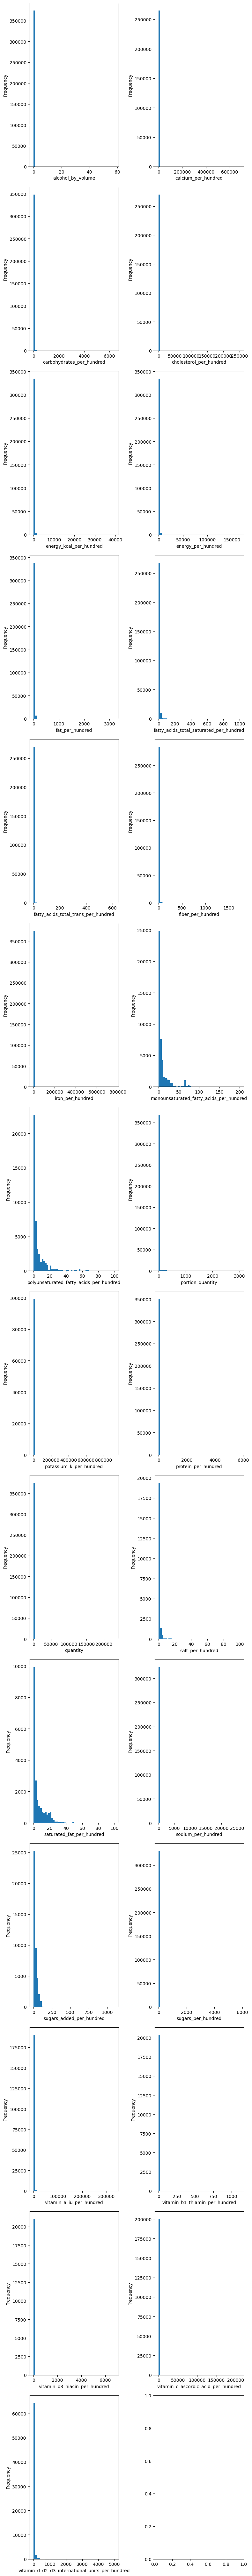

In [48]:
#Initiating empty subplots
fig, axes = plt.subplots(nrows = (len(num_cols) + 1) // 2, 
                         ncols = 2, figsize= (8, 3 * len(num_cols)))


#Initiating counter
counter = 0

#Filling subplots
for column in num_cols:
    row = counter // 2
    col = counter % 2
    axes[row, col].hist(x=df2[column], bins=50)
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel("Frequency")
    counter += 1


plt.tight_layout()
plt.show()

#### The histograms above confirm that many numerical columns have outliers, which are the maxima that we saw above with the describe() method.

#### 3. Errors and unrealistic values are a real problem for the reliability of our results. Hence part of the preliminary EDA aims to check for such problematic values. Using the statistics and your plots of the per_hundred columns (e.g. protein_per_hundred, fat_per_hundred, etc.) from previous task, your task is to identify and address these problematic values. Afterwards re-run the descriptive statistics and plots to check everything is ok now.

In [49]:
#Creating a copy of df2
df_keep = df2.copy()
df_keep.columns

Index(['alcohol_by_volume', 'barcode', 'calcium_per_hundred', 'calcium_unit',
       'carbohydrates_per_hundred', 'carbohydrates_unit',
       'cholesterol_per_hundred', 'cholesterol_unit', 'copper_cu_unit',
       'country', 'created_at', 'energy_kcal_per_hundred', 'energy_kcal_unit',
       'energy_per_hundred', 'energy_unit', 'fat_per_hundred', 'fat_unit',
       'fatty_acids_total_saturated_per_hundred',
       'fatty_acids_total_saturated_unit',
       'fatty_acids_total_trans_per_hundred', 'fatty_acids_total_trans_unit',
       'fiber_insoluble_unit', 'fiber_per_hundred', 'fiber_soluble_unit',
       'fiber_unit', 'folate_total_unit', 'folic_acid_unit', 'hundred_unit',
       'id', 'ingredients_en', 'iron_per_hundred', 'iron_unit',
       'magnesium_unit', 'manganese_mn_unit',
       'monounsaturated_fatty_acids_per_hundred',
       'monounsaturated_fatty_acids_unit', 'phosphorus_unit',
       'polyunsaturated_fatty_acids_per_hundred',
       'polyunsaturated_fatty_acids_unit', '

In [50]:

for column in df_keep.columns:
    
    #Filter for grams
    if "_unit" in column and "g" in df_keep[column].values:
        corresponding_per_hundred_column = column.replace('_unit', '_per_hundred')
        if corresponding_per_hundred_column in df_keep.columns:
            filter_g = df_keep[corresponding_per_hundred_column] > 100
            df_keep = df_keep[~filter_g]


    #Filter for mg
    elif "_unit" in column and "mg" in df_keep[column].values:
        corresponding_per_hundred_column = column.replace('_unit', '_per_hundred')
        if corresponding_per_hundred_column in df_keep.columns:
            filter_mg = df_keep[corresponding_per_hundred_column] > 10**5
            df_keep = df_keep[~filter_mg]
            
    #Filter for micrograms
    elif "_unit" in column and "µg" in df_keep[column].values:
        corresponding_per_hundred_column = column.replace('_unit', '_per_hundred')
        if corresponding_per_hundred_column in df_keep.columns:
            filter_ug = df_keep[corresponding_per_hundred_column] > 10**8
            df_keep = df_keep[~filter_ug]

    #Filter for kJ
    elif "_unit" in column and "kJ" in df_keep[column].values:
        corresponding_per_hundred_column = column.replace('_unit', '_per_hundred')
        if corresponding_per_hundred_column in df_keep.columns:
            filter_kJ = df_keep[corresponding_per_hundred_column] > 3700
            df_keep = df_keep[~filter_kJ]
            
    #Filter for kcal
    elif "_unit" in column and "kcal" in df_keep[column].values:
        corresponding_per_hundred_column = column.replace('_unit', '_per_hundred')
        if corresponding_per_hundred_column in df_keep.columns:
            filter_kcal = df_keep[corresponding_per_hundred_column] > 885
            df_keep = df_keep[~filter_kcal]

    
    else:
        #Filter for Vitamin A IU
        if "_unit" in column and "vitamin_a" in column and "IU" in df_keep[column].values:
            corresponding_per_hundred_column = column.replace('_unit', '_per_hundred')
            if corresponding_per_hundred_column in df_keep.columns:
                filter_1_IU_Vitamin_A = df_keep[corresponding_per_hundred_column] > 3.3*10**8
                df_keep = df_keep[~filter_1_IU_Vitamin_A]
                
        #Filter for Vitamin D IU
        elif "_unit" in column and "vitamin_d" in column and "IU" in df_keep[column].values:
            corresponding_per_hundred_column = column.replace('_unit', '_per_hundred')
            if corresponding_per_hundred_column in df_keep.columns:
                filter_1_IU_Vitamin_D = df_keep[corresponding_per_hundred_column] > 0.4*10**9
                df_keep = df_keep[~filter_1_IU_Vitamin_D]

In [51]:
# Storing all numerical columns of df2 in list num_cols
num_cols_keep = df_keep.select_dtypes(include="float64").columns

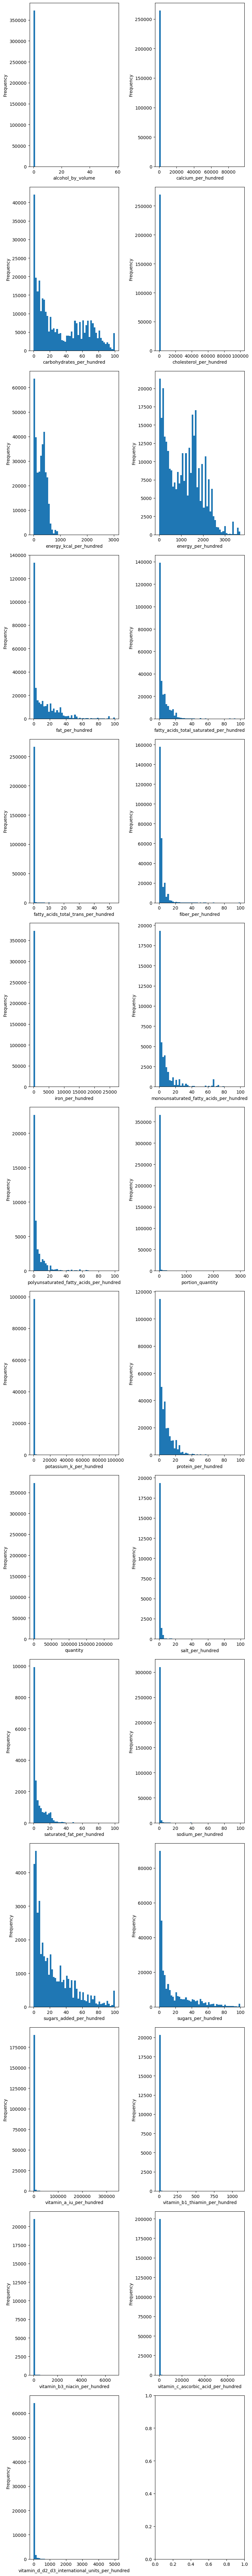

In [52]:
#Initiating empty subplots
fig, axes = plt.subplots(nrows = (len(num_cols_keep) + 1) // 2, 
                         ncols = 2, figsize= (8, 3 * len(num_cols_keep)))


#Initiating counter
counter = 0

#Filling subplots
for column in num_cols_keep:
    row = counter // 2
    col = counter % 2
    axes[row, col].hist(x=df_keep[column], bins=50)
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel("Frequency")
    counter += 1


plt.tight_layout()
plt.show()

#### 4. Columns in our data set may be related to each other or pose constraints on one another. Unfortunately, this may also give rise to inconsistencies. Your task is to investigate the three cases below analytically (including visualizations like scatterplots), identify potential inconsistencies and address them. You should allow for some rounding errors and verify that your approaches have addressed the issues appropriately.

##### a) The bulk of most products is made up of the four main macronutrients (fat, protein, carbohydrates and fiber). In the previous subtask we checked that each of their "_per_hundred"-value is at most 100g. We can equally apply the same logic for their combined amount. For example, a product with 64g of carbohydrates, 43g of protein and 12g of fat would give us a total of 119g of macronutrients in 100g of produce. Clearly that is not realistic.

In [53]:
#Filter on rows where sum of fats, proteins, carbohydrates and fiber is > 100
filter_100 = df_keep[["carbohydrates_per_hundred", "protein_per_hundred", 
                      "fat_per_hundred", "fiber_per_hundred"]].sum(axis=1) <= 100
df_keep[~filter_100].shape
print("The percentage of rows where the sum of fats, proteins, carbohydrates and fiber is higher than 100 is:")
print(100*len(df_keep[~filter_100])/len(df_keep))
len(df_keep)

The percentage of rows where the sum of fats, proteins, carbohydrates and fiber is higher than 100 is:
7.5220633784120805


372903

In [54]:
df_keep.drop(df_keep[~filter_100].index, inplace=True, axis=0)

In [55]:
len(df_keep)

344853

#### b) The column "energy_per_hundred" measures the energy content in kJ. Analyze its relationship with the column "energy_kcal_per_hundred".

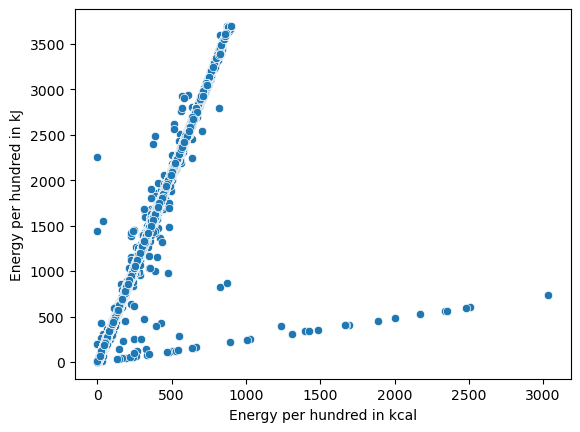

In [56]:
scatterplot = sns.scatterplot(data=df_keep, x=df_keep["energy_kcal_per_hundred"], 
                              y=df_keep["energy_per_hundred"])
plt.xlabel("Energy per hundred in kcal")
plt.ylabel("Energy per hundred in kJ")
plt.show()

We note that a few datapoints are not on the line of slope 4.184. I will therefore remove those from the dataset

In [57]:
#Remove all data points that are not on the line of slope 4.184 (conversion factor from kcal to kJ) within a tolerance of 1%

tolerance = 0.01
conversion_kcal_to_J = 4.184 
filter_slope = ((df_keep["energy_per_hundred"] / df_keep["energy_kcal_per_hundred"] < conversion_kcal_to_J * (1 - tolerance)) 
                | (df_keep["energy_per_hundred"] / df_keep["energy_kcal_per_hundred"] > conversion_kcal_to_J * (1 + tolerance)))

df_keep.drop(df_keep[filter_slope].index, inplace=True, axis=0)


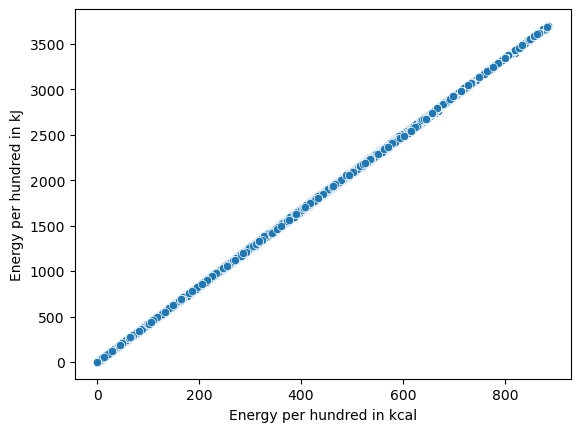

In [58]:
#Replotting
scatterplot = sns.scatterplot(data=df_keep, x=df_keep["energy_kcal_per_hundred"], 
                              y=df_keep["energy_per_hundred"])
plt.xlabel("Energy per hundred in kcal")
plt.ylabel("Energy per hundred in kJ")
plt.show()

#### c) Each of the four macronutrients has a specific energy content (fat 37 kJ/g, protein and carbohydrates 17 kJ/g, fibre 8 kJ/g). Calculate the energy provided by these four macronutrients and compare this to the "energy_per_hundred"-column. Keep in mind that we are only looking at a subset of all the nutrients.

In [59]:
# Multiplying each macronutrient by its energy content and dividing by 100 to get the content by [g]
df_keep["Total_energy_of_macronutrients"] = 1/100*(df_keep["carbohydrates_per_hundred"]*17 + df_keep["protein_per_hundred"]*17
                                                   + df_keep["fat_per_hundred"]*37 + df_keep["fiber_per_hundred"]*8)

#Calculating energy/g based on energy per hundred grams
df_keep["energy_per_g"] = 1/100 * df_keep["energy_per_hundred"]


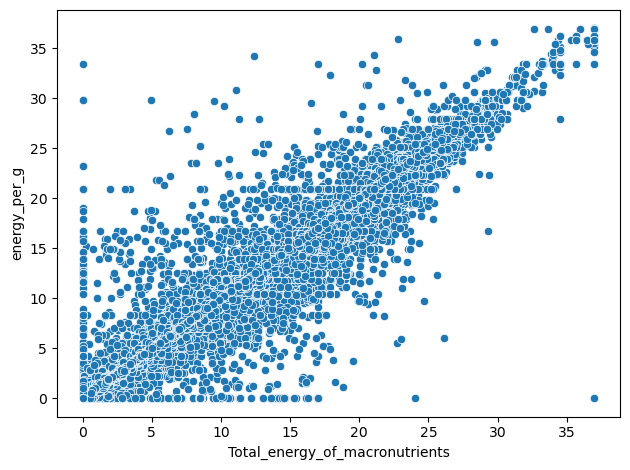

In [60]:
# Plotting column "Total_energy_of_macronutrients" versus column "energy_per_hundred"
plot_energy = sns.scatterplot(data=df_keep, x="Total_energy_of_macronutrients", y="energy_per_g")
plt.tight_layout()
plt.show()

The scatter plot above shows that indeed the four macronutrients do not make up for the entire energy content of each product. 
This is only the case for the products which are on the line of slope 1 above.

#### 5. Despite removing recording errors from the per_hundred columns, some of them still contain “extreme” values, which are distinct from the rest of the data points. Your goal is to pick a few variables from the per_hundred list and address outliers. Be mindful that some outlier detection approaches are not reliable when the underlying variables are strongly skewed.

I will perform some outlier detection on the columns "calcium_per_hundred" and "cholesterol_per_hundred" since, based on the histograms above, those still have some outliers.

In [61]:
# Defining z filters for both columns
zfilter_calcium = np.abs(df["calcium_per_hundred"] - df["calcium_per_hundred"].mean()) > (3 * df["calcium_per_hundred"].std())
zfilter_cholesterol = np.abs(df["cholesterol_per_hundred"] - df["cholesterol_per_hundred"].mean()) > (3 * df["cholesterol_per_hundred"].std())

In [62]:
# Checking the number of outliers for calcium and cholesterol
print("Number of outliers detected for calcium using z-scores:")
print(zfilter_calcium.sum(axis=0))
print("Number of outliers detected for cholesterol using z-scores:")
print(zfilter_cholesterol.sum(axis=0))

Number of outliers detected for calcium using z-scores:
71
Number of outliers detected for cholesterol using z-scores:
183


In [63]:
# Creating two dataframes containing the outliers for calcium and cholesterol
outliers_calcium = df_keep.loc[zfilter_calcium, :]
outliers_cholesterol = df_keep.loc[zfilter_cholesterol, :]

In [64]:
len(df_keep)

337562

In [65]:
# Dropping all rows in df_keep that contain outliers for calcium and cholesterol based on their row index
df_keep.drop(outliers_calcium.index, axis=0, inplace=True)
df_keep.drop(outliers_cholesterol.index, axis=0, inplace=True)

In [66]:
len(df_keep)

337396

The number of rows that were dropped is:

In [67]:
print(337562 - 337396)

166


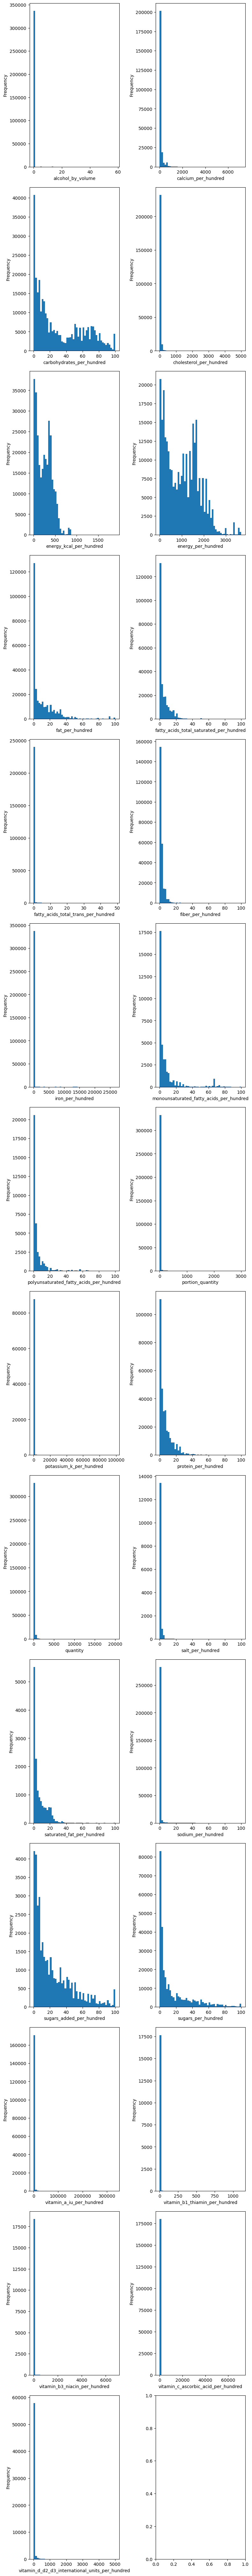

In [68]:
#Initiating empty subplots
fig, axes = plt.subplots(nrows = (len(num_cols_keep) + 1) // 2, 
                         ncols = 2, figsize= (8, 3 * len(num_cols_keep)))


#Initiating counter
counter = 0

#Filling subplots
for column in num_cols_keep:
    row = counter // 2
    col = counter % 2
    axes[row, col].hist(x=df_keep[column], bins=50)
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel("Frequency")
    counter += 1


plt.tight_layout()
plt.show()

# Task D

#### 1. Find the product with the longest ingredients list, i.e. the largest number of ingredients. Print the product name and its ingredient list.

In [69]:
# Set display options to show the entire content of the 'ingredients_en' column
pd.set_option('display.max_colwidth', None)

In [70]:
# First, I remove rows in df_keep where it is only written "ingredient_missing"
df_keep = df_keep.drop(df_keep[df_keep["ingredients_en"] == "ingredient_missing"].index)

In [71]:
# I first create an ingredients list for each product by splitting on either ", " or ". "
ingredients_list = df_keep["ingredients_en"].apply(lambda x: re.split(r", |\. ", x))

In [72]:
print("The maximum number of ingredients is:")
print(ingredients_list.str.len().max())

The maximum number of ingredients is:
189


In [73]:
print("The product with the maximum number of ingredients is:")
print(df_keep.loc[ingredients_list.str.len().idxmax(), "product_name_en"])

The product with the maximum number of ingredients is:
VANILLA AND RASPBERRY, RED VELVET, CARROT, CHOCOLATE VARIETY PETIT FOURS, VANILLA AND RASPBERRY, RED VELVET, CARROT, CHOCOLATE


In [74]:
print("The list of ingredients is:")
print(df_keep.loc[ingredients_list.str.len().idxmax(), "ingredients_en"])

The list of ingredients is:
WATER, POWDERED SUGAR (SUGAR, CORN STARCH), CHOCOLATE ICING (SUGAR, WATER, PALM OIL, CORN SYRUP, COCOA PROCESSED WITH ALKALI, CONTAINS 2% OR LESS OF: CARAMEL COLOR, CELLULOSE GUM, MONO- AND DIGLYCERIDES, NATURAL AND ARTIFICIAL FLAVOR, POLYSORBATE 60, POTASSIUM SORBATE [PRESERVATIVE], SORBIC ACID [PRESERVATIVE], SALT, SOY LECITHIN, SOYBEAN OIL, SULFITES, XANTHAN GUM), CARROT CAKE (SUGAR, ENRICHED WHEAT FLOUR BLEACHED [FLOUR, NIACIN, REDUCED IRON, THIAMINE MONONITRATE, RIBOFLAVIN, FOLIC ACID], SOYBEAN OIL, DEXTROSE, CARROTS, FOOD STARCH-MODIFIED, DRIED EGG YOLK, LEAVENING [BAKING SODA, SODIUM ACID PYROPHOSPHATE, SODIUM ALUMINUM PHOSPHATE, ALUMINUM SULFATE], DRIED EGG WHITES, NATURAL AND ARTIFICIAL FLAVOR, SALT, XANTHAN GUM, PROPYLENE GLYCOL, GUAR GUM, WATER, CARAMEL COLOR, CORN SYRUP, POLYSORBATE 80, GLYCERIN, CORN STARCH, CORN OIL, WHEAT STARCH, BETA CAROTENE [COLOR], TOCOPHEROLS [PRESERVATIVE], CITRIC ACID [PRESERVATIVE], SILICON DIOXIDE), RED VELVET CAKE (S

#### 2.Find the products with the shortest ingredients list, i.e. the fewest ingredients. Display some examples and comment on your observation.

In [75]:
# Defining an arbitrary threshold of 2 ingredients
thresh = 2

# Creating a filter few_ingredients for all products that have less than 2 ingredients
few_ingredients = ingredients_list.str.len() <= thresh    

In [76]:
print("30 examples of products with the fewest ingredients are:")
print(df_keep.loc[few_ingredients, "product_name_en"].sample(30))

30 examples of products with the fewest ingredients are:
115071                         GIANT, BLACK EYE PEAS
175287                          APRICOT-HONEY SPREAD
323623                              FRIED PORK SKINS
175265                               AHI TUNA STEAKS
105120                       ESSENTIAL EVERYDAY, TEA
178827                          UNSALTED RAW WALNUTS
237751                              MILLED FLAX SEED
314691                       100% APPLE JUICE, APPLE
318426         100% PREMIUM GROVE STYLE ORANGE JUICE
154822                                         HONEY
175245                             ORGANIC BABY KALE
187031                               CUT GREEN BEANS
318486                         LONG GRAIN WHITE RICE
235545                                   GROUND BEEF
68156                          LONG GRAIN WHITE RICE
356581                         LIME SLICES WITH PEEL
271708                              100% FRUIT JUICE
52068                        ARGO, CORN ST

The products with the shortest list of ingredients are as expected simple, e.g. sparkling water, honey or just coconut oil.

#### 3. Identify the most frequent ingredients across all products. Start by pringing and exploring several ingredient list in order to identify issues that need to be addressed through text cleaning. Clearly state some of the main issues, then formulate and implement a strategy to address these cases. Check that the issues where indeed resolved by printing the full ingredient lists of some examples before and after text cleaning. Finally you will choose an appropriate method to visualize your findings.

In [77]:
# Checking the ingredient list of a few randomly selected products
random_index = random.randint(0, len(df_keep) - 1)
df_keep.loc[random_index, "ingredients_en"]

'GREEN MANZANILLA OLIVES, WATER, PASTE (PIMIENTO, SODIUM ALGINATE, GUAR GUM, CALCIUM CHLORIDE, POTASSIUM SORBATE [PRESERVATIVE]), SALT, CITRIC ACID, ASCORBIC ACID.'

I want to remove all punctuation marks, parentheses and * symbols. 
Also, I will replace all double and triple white spaces with simple white spaces and convert all characters to upper case.
Then, I want to remove all digits and % symbols.
Finally, I will also remove stopwords using the nltk library, since these could affect my frequency analysis.

In [78]:
def process_text(text):
    
    #Removing punctuation marks, brackets and other symbols
    clean_text = re.sub(r"[,\.\[\]\(\)\{\}\%\*]", "", text)
    
    #Convert all text to upper case
    clean_text = clean_text.upper()
    
    #Removing double and triple white spaces
    clean_text = re.sub(r"  ", " ", clean_text)
    clean_text = re.sub(r"  ", " ", clean_text)
    
    #Removing all digits
    clean_text = re.sub(r"[\d]", "", clean_text)
    
    #Removing stopwords and uninformative words, such as "AND", "OR" "OF" and "LESS"
    processed_sample_tokens = [tok for tok in clean_text.split() if tok not in stopwords_english and tok not in 
                               ["AND","OR","OF","LESS","WITH","CONTAINS","EXTRACT","ACID","NATURAL","FLAVOR","FLAVORS,""CITRIC","COLOR","RED"]]
        
    return processed_sample_tokens

In [79]:
# Creating a new column with cleaned ingredients list in df_keep
df_keep["cleaned_ingredients_en"] = df_keep["ingredients_en"].apply(lambda x: process_text(x))

In [80]:
# Checking before and after processing
random_index = random.randint(0, len(df_keep) - 1)
print("Product name: " + df_keep.loc[random_index, "product_name_en"])
print("Before processing:")
print(df_keep.loc[random_index, "ingredients_en"])
print("After processing:")
print(df_keep.loc[random_index, "cleaned_ingredients_en"])

KeyError: 42632

In [81]:
# Creating a Counter object containing all ingredients across all products
all_ingredients = Counter()

for ingredients_list in df_keep["cleaned_ingredients_en"]:
    all_ingredients.update(ingredients_list)

# Find top-50 most common words
w = Counter(all_ingredients).most_common(50)


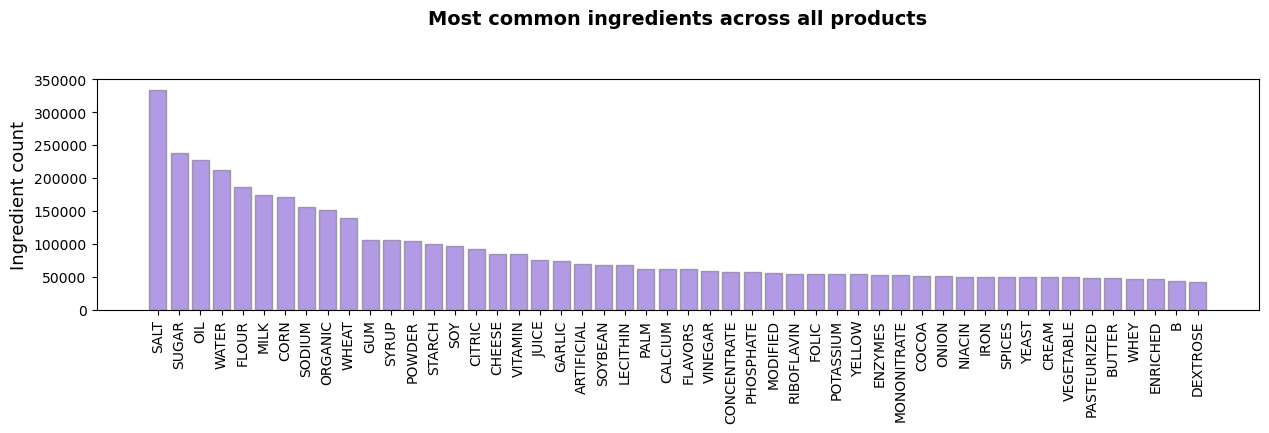

In [82]:
# Now plotting the 50 most common ingredients across all products

# Barplot and font specifications
barplot_specs   = {"color": "mediumpurple", "alpha": 0.7, "edgecolor": "grey"}
title_specs     = {"fontsize": 14, "fontweight": "bold", "y": 1.2}
suptitle_specs  = {"fontsize": 11}
label_specs     = {"fontsize": 13}

plt.figure(figsize=(15,3))
plt.bar(*zip(*w), **barplot_specs)
plt.title("Most common ingredients across all products", **title_specs)
plt.ylabel('Ingredient count', **label_specs)
plt.xticks(rotation=90)
plt.show()

The top 5 ingredients across all products are without surprise SALT, SUGAR, OIL, WATER and FLOUR. 
Unfortunately, salt, sugar and oil are not known are not known for their health benefits.

# Task E

1. Your task is to investigate the total number of items created each month at each hour. You should use the created_at column to draw a heatmap with the hours (0 to 23) on the x-axis and the months (1 to 12) on the y-axis. The color of the heatmap should show the number of items created at each month-hour pair. As always include any observations and their discussion.

In [83]:
#Converting to pandas datetime format
df_keep["created_at"] = pd.to_datetime(df_keep["created_at"], format="%Y-%m-%dT%H:%M:%S.%fZ")

In [84]:
#Setting index to column "created_at"
df_keep.set_index("created_at", inplace=True)

In [85]:
#Creating two new columns Month and Hour
df_keep["Month"] = df_keep.index.month
df_keep["Hour"] = df_keep.index.hour

In [86]:
df_keep["Hour"].tail()

created_at
2021-09-14 14:14:23.996    14
2021-09-24 08:09:48.668     8
2021-09-27 09:01:14.855     9
2021-09-28 08:35:16.798     8
2021-09-30 13:19:30.989    13
Name: Hour, dtype: int32

In [87]:
grouped_data = df_keep.groupby(["Month", "Hour"]).size().reset_index()
grouped_data.rename(columns={0:"Item count"}, inplace=True)
grouped_data.tail()

Month  Hour  Item count
182     12    17          14
183     12    18           4
184     12    19           1
185     12    20           4
186     12    21          10

In [88]:
df_pivot = grouped_data.pivot(index="Hour", columns="Month", values="Item count").fillna(0)
df_pivot

Month    1     2     3         4     5      6      7     8      9     10  \
Hour                                                                       
0       0.0   0.0   0.0       0.0   0.0    1.0  122.0   0.0    0.0   0.0   
1       0.0   0.0   0.0       1.0   0.0    0.0    7.0   0.0    0.0   0.0   
2       0.0   0.0   0.0       0.0   0.0    3.0    0.0   0.0    0.0   0.0   
3       0.0   0.0   0.0       0.0   0.0    0.0    0.0   0.0    0.0   0.0   
4       0.0   0.0   0.0       0.0   0.0    0.0    0.0   0.0    0.0   0.0   
5       0.0   0.0   0.0       2.0   0.0    0.0    0.0   0.0    1.0   1.0   
6       2.0   0.0   0.0       8.0   5.0   15.0  374.0   2.0   95.0  32.0   
7      10.0   0.0  12.0      56.0  17.0   26.0   21.0  46.0   24.0  13.0   
8      23.0  14.0  35.0       8.0  26.0   35.0   13.0   2.0    3.0  30.0   
9      51.0  15.0  20.0      37.0  18.0   23.0    7.0   8.0   15.0  11.0   
10     30.0  12.0  30.0  295767.0   9.0   24.0  179.0   7.0   58.0  19.0   
11      3.0   1.0  73.0      28.0  12.0   10.0  139.0   9.0  126.0  58.0   
12     22.0  16.0  10.0      26.0   9.0   70.0   14.0   7.0  154.0  44.0   
13     23.0  17.0  21.0      13.0  11.0    8.0   33.0   3.0   40.0  12.0   
14     16.0   4.0  34.0      10.0   6.0  117.0    7.0   3.0   43.0   1.0   
15      4.0   7.0  15.0       2.0   3.0   15.0   38.0  16.0   97.0  65.0   
16      1.0   0.0  11.0       1.0   1.0   13.0  346.0   7.0  558.0   1.0   
17      3.0   2.0  11.0       2.0  10.0    3.0   67.0   3.0  267.0   2.0   
18      0.0   0.0   1.0       0.0   0.0    0.0   33.0   3.0  256.0   3.0   
19      0.0   1.0   1.0       4.0   9.0    0.0   88.0   1.0  490.0   1.0   
20      1.0   2.0   6.0       0.0   0.0    1.0  469.0   2.0    0.0  52.0   
21      0.0   8.0   0.0       4.0   0.0    0.0  307.0   1.0  195.0   3.0   
22      0.0   0.0   0.0       0.0   0.0    4.0  118.0   0.0    0.0   0.0   
23      0.0   0.0   0.0       0.0   0.0    0.0  216.0   0.0    0.0   0.0   

Month     11    12  
Hour                
0        0.0   0.0  
1        0.0   1.0  
2        0.0   0.0  
3        1.0   0.0  
4        1.0   0.0  
5        0.0   0.0  
6        0.0   3.0  
7       37.0   2.0  
8      105.0   5.0  
9       64.0  18.0  
10      12.0  46.0  
11      87.0   4.0  
12      45.0   3.0  
13      14.0  11.0  
14       3.0  24.0  
15       6.0   1.0  
16      45.0   3.0  
17       1.0  14.0  
18       2.0   4.0  
19      33.0   1.0  
20      44.0   4.0  
21       0.0  10.0  
22       1.0   0.0  
23       0.0   0.0

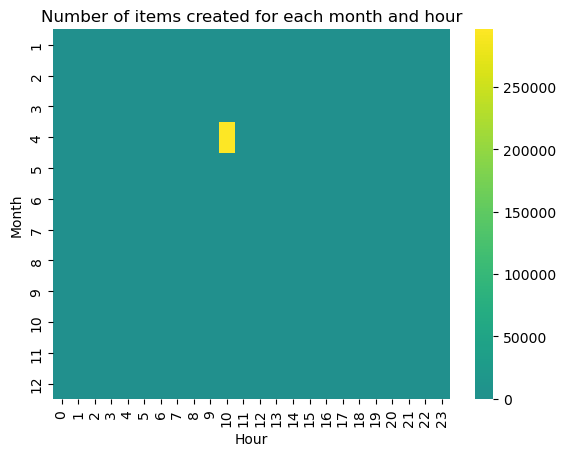

In [89]:
sns.heatmap(data=df_pivot.T, cmap='viridis', center=True)
plt.title("Number of items created for each month and hour")
plt.show()

We notice that almost all items were created in April between 10 and 11 am. 